<a href="https://colab.research.google.com/github/julie-nguyen180/Quantium_Chips_Category_Analysis_Case/blob/main/Quantium_Case_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Data preparation and customer analytics

## Data Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

cust_df = pd.read_csv('/content/drive/MyDrive/Quantium/QVI_purchase_behaviour.csv')
trans_df = pd.read_excel('/content/drive/MyDrive/Quantium/QVI_transaction_data.xlsx')

## Data Exploration

### Transaction Data

In [3]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [4]:
# Check null values
for col in trans_df.columns:
  print(f"Column '{col}': {trans_df[col].isnull().sum()} null values")

Column 'DATE': 0 null values
Column 'STORE_NBR': 0 null values
Column 'LYLTY_CARD_NBR': 0 null values
Column 'TXN_ID': 0 null values
Column 'PROD_NBR': 0 null values
Column 'PROD_NAME': 0 null values
Column 'PROD_QTY': 0 null values
Column 'TOT_SALES': 0 null values


In [5]:
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


We can see that the date column is in an integer format. Let's change this to a
date format.

#### Change date format

In [6]:
# Change date from xls integer dates to date format
trans_df['DATE'] = pd.to_datetime(trans_df['DATE'], unit='D', origin='1899-12-30')

print(trans_df['DATE'].dtype)
trans_df.head()

datetime64[ns]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Check product name

We should check that we are looking at the right products by examining PROD_NAME.

In [7]:
print(trans_df['PROD_NAME'].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [8]:
# Count Frequency of Each Product Name
print(trans_df['PROD_NAME'].value_counts())

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64


Looks like we are definitely looking at potato chips but how can we check that
these are all chips? We can do some basic text analysis by summarising the
individual words in the product name.

In [9]:
import re
from collections import Counter

unique_prod_names = trans_df['PROD_NAME'].unique()

# Split each product name into words
all_words = []
for name in unique_prod_names:
    words = re.findall(r'\b\w+\b', name)  # Finds alphanumeric words
    all_words.extend(words)

print(all_words)

['Natural', 'Chip', 'Compny', 'SeaSalt175g', 'CCs', 'Nacho', 'Cheese', '175g', 'Smiths', 'Crinkle', 'Cut', 'Chips', 'Chicken', '170g', 'Smiths', 'Chip', 'Thinly', 'S', 'Cream', 'Onion', '175g', 'Kettle', 'Tortilla', 'ChpsHny', 'Jlpno', 'Chili', '150g', 'Old', 'El', 'Paso', 'Salsa', 'Dip', 'Tomato', 'Mild', '300g', 'Smiths', 'Crinkle', 'Chips', 'Salt', 'Vinegar', '330g', 'Grain', 'Waves', 'Sweet', 'Chilli', '210g', 'Doritos', 'Corn', 'Chip', 'Mexican', 'Jalapeno', '150g', 'Grain', 'Waves', 'Sour', 'Cream', 'Chives', '210G', 'Kettle', 'Sensations', 'Siracha', 'Lime', '150g', 'Twisties', 'Cheese', '270g', 'WW', 'Crinkle', 'Cut', 'Chicken', '175g', 'Thins', 'Chips', 'Light', 'Tangy', '175g', 'CCs', 'Original', '175g', 'Burger', 'Rings', '220g', 'NCC', 'Sour', 'Cream', 'Garden', 'Chives', '175g', 'Doritos', 'Corn', 'Chip', 'Southern', 'Chicken', '150g', 'Cheezels', 'Cheese', 'Box', '125g', 'Smiths', 'Crinkle', 'Original', '330g', 'Infzns', 'Crn', 'Crnchers', 'Tangy', 'Gcamole', '110g', 'Ket

As we are only interested in words that will tell us if the product is chips or
not, let's remove all words with digits and special characters such as '&' from our
set of product words.

In [10]:
filtered_words = [word for word in all_words if word.isalpha()]
word_counts = Counter(filtered_words)
print(word_counts)

Counter({'Chips': 21, 'Smiths': 16, 'Crinkle': 14, 'Cut': 14, 'Kettle': 13, 'Cheese': 12, 'Salt': 12, 'Original': 10, 'Chip': 9, 'Salsa': 9, 'Doritos': 9, 'Corn': 8, 'Pringles': 8, 'RRD': 8, 'Chicken': 7, 'Cream': 7, 'Chilli': 7, 'WW': 7, 'Sour': 6, 'Sea': 6, 'Thinly': 5, 'Vinegar': 5, 'Thins': 5, 'Crisps': 5, 'Natural': 4, 'Sweet': 4, 'Chives': 4, 'Lime': 4, 'Red': 4, 'Rock': 4, 'Deli': 4, 'Supreme': 4, 'Infuzions': 4, 'CCs': 3, 'Tortilla': 3, 'Old': 3, 'El': 3, 'Paso': 3, 'Dip': 3, 'Tomato': 3, 'Mild': 3, 'Sensations': 3, 'Twisties': 3, 'BBQ': 3, 'Swt': 3, 'Soy': 3, 'Cobs': 3, 'Popd': 3, 'Woolworths': 3, 'Tostitos': 3, 'Nacho': 2, 'S': 2, 'Onion': 2, 'Grain': 2, 'Waves': 2, 'Tangy': 2, 'Burger': 2, 'Rings': 2, 'Cheezels': 2, 'And': 2, 'Thai': 2, 'SR': 2, 'French': 2, 'ChipCo': 2, 'Smith': 2, 'Honey': 2, 'Tyrrells': 2, 'Lightly': 2, 'Salted': 2, 'Medium': 2, 'SourCream': 2, 'Chs': 2, 'Potato': 2, 'Cheetos': 2, 'Garlic': 2, 'Compny': 1, 'ChpsHny': 1, 'Jlpno': 1, 'Chili': 1, 'Mexican': 

There are salsa products in the dataset but we are only interested in the chips
category, so let's remove these.

In [11]:
# Count the number of rows before removing salsa entries
rows_before = len(trans_df)

# Filter out salsa entries
is_salsa = trans_df['PROD_NAME'].str.contains('salsa', case=False, na=False)
trans_df = trans_df[~is_salsa]

# Count the number of rows after removing salsa entries
rows_after = len(trans_df)

# Calculate how many entries were removed
entries_removed = rows_before - rows_after
print(f"Number of entries removed: {entries_removed}")

trans_df.info()

Number of entries removed: 18094
<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


#### Check outlier

In [12]:
trans_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


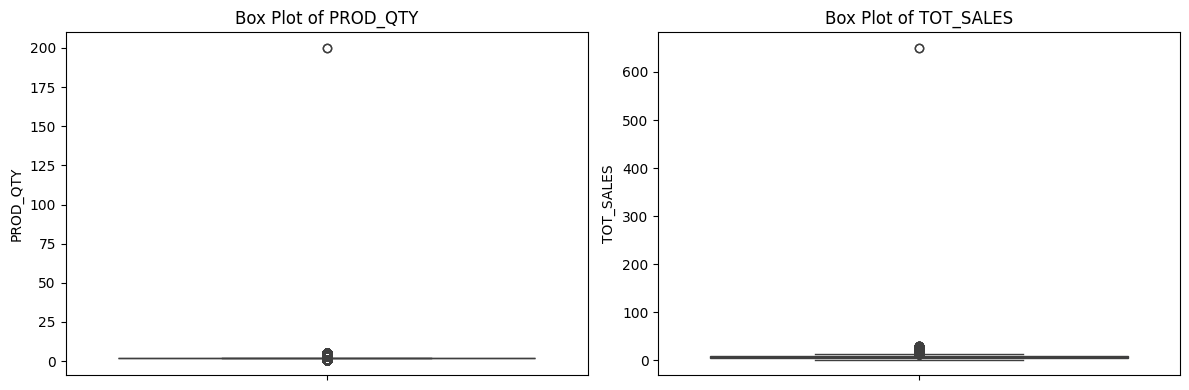

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 4))

# Boxplot for 'PROD_QTY'
plt.subplot(1, 2, 1)
sns.boxplot(y=trans_df['PROD_QTY'])
plt.title('Box Plot of PROD_QTY')

# Boxplot for 'TOT_SALES'
plt.subplot(1, 2, 2)
sns.boxplot(y=trans_df['TOT_SALES'])
plt.title('Box Plot of TOT_SALES')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

The max values of PROD_QTY and TOT_SALES are significantly high. Let's investigate further the case where 200 packets of chips are bought in one transaction.

In [14]:
# Filter the transactions that have 200 packets
trans_df.loc[trans_df['PROD_QTY'] == 200.0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer.
Let's see if the customer has had other transactions

In [15]:
# Filter the transactions from customer 226000
trans_df.loc[trans_df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.

In [16]:
# Remove the transactions
trans_df = trans_df[trans_df['LYLTY_CARD_NBR'] != 226000]

In [17]:
trans_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


#### Check transaction lines over time

Let's look at the number of transaction lines over time to see
if there are any obvious data issues such as missing data.

In [18]:
# Count the number of transactions by date
transactions_by_date = trans_df.groupby('DATE').size()

print(transactions_by_date)

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Length: 364, dtype: int64


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.

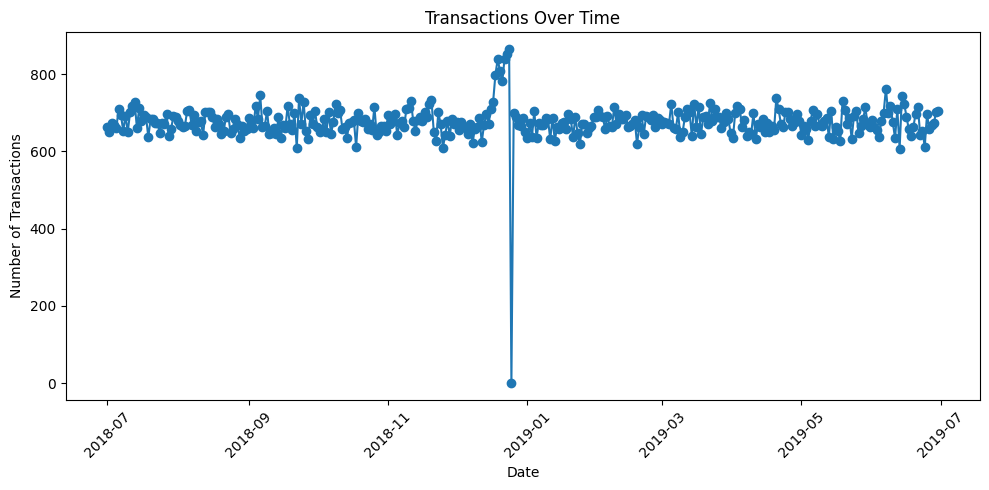

In [19]:
import matplotlib.pyplot as plt

# Generate a full date range from 1 July 2018 to 30 June 2019
full_date_range = pd.date_range(start='2018-07-01', end='2019-06-30')

# Convert transaction dates to datetime format (if not already)
trans_df['DATE'] = pd.to_datetime(trans_df['DATE'], format='%Y%m%d')

# Count transactions by date
transactions_by_date = trans_df.groupby('DATE').size()

# Create a DataFrame with all dates and join the transaction counts
date_counts = pd.DataFrame({'DATE': full_date_range})
date_counts['TRANSACTION_COUNT'] = date_counts['DATE'].map(transactions_by_date).fillna(0)

# Plot the number of transactions over time
plt.figure(figsize=(10, 5))
plt.plot(date_counts['DATE'], date_counts['TRANSACTION_COUNT'], marker='o', linestyle='-')
plt.title("Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that there is an increase in purchases in December and a break in late
December. Let's zoom in on this.

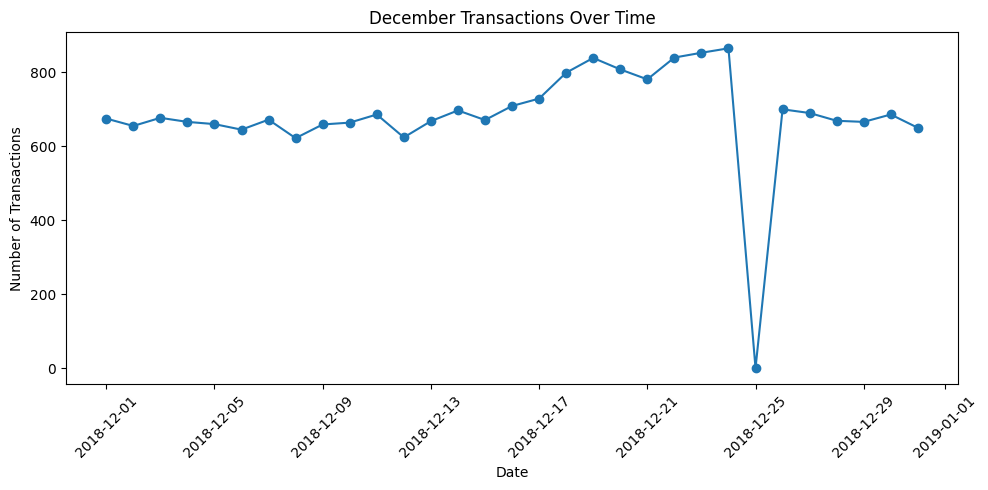

In [20]:
# Filter for December dates only
december_data = date_counts[(date_counts['DATE'] >= '2018-12-01') & (date_counts['DATE'] <= '2018-12-31')]

# Plot transactions for individual days in December
plt.figure(figsize=(10, 5))
plt.plot(december_data['DATE'], december_data['TRANSACTION_COUNT'], marker='o', linestyle='-')
plt.title("December Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.
Now that we are satisfied that the data no longer has outliers.

#### Create Pack Size feature

We can move on to creating other features such as brand of chips or pack size from PROD_NAME. We will start with pack size. We can work this out by taking the digits that are in PROD_NAME

In [21]:
# Extract pack size by looking for digits in the product name
trans_df['PACK_SIZE'] = trans_df['PROD_NAME'].str.extract(r'(\d+)', expand=False).astype(float)

# Print pack sizes and their counts in ascending order
print(trans_df['PACK_SIZE'].value_counts().sort_index())

PACK_SIZE
70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    40203
160.0     2970
165.0    15297
170.0    19983
175.0    66390
180.0     1468
190.0     2995
200.0     4473
210.0     6272
220.0     1564
250.0     3169
270.0     6285
330.0    12540
380.0     6416
Name: count, dtype: int64


The largest size is 380g and the smallest size is 70g - seems sensible!

Let's plot a histogram of PACK_SIZE since we know that it is a categorical
variable and not a continuous variable even though it is numeric.

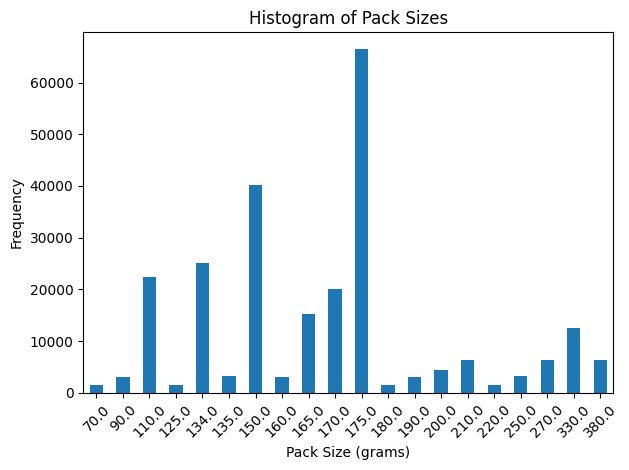

In [22]:
# Plot a histogram of PACK_SIZE
trans_df['PACK_SIZE'].value_counts(sort=False).sort_index().plot(kind='bar')

# Add labels and title
plt.title('Histogram of Pack Sizes')
plt.xlabel('Pack Size (grams)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### Create Brand feature

Now to create brands, we can use the first word in PROD_NAME to work out the brand
name.

In [23]:
# Extract brand by taking the first word from PROD_NAME
trans_df['BRAND'] = trans_df['PROD_NAME'].str.split().str[0]

print(trans_df['BRAND'].value_counts().sort_index())

BRAND
Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: count, dtype: int64


Some of the brand names look like they are of the same brands - such as RED and
RRD, which are both Red Rock Deli chips. Let's combine these together.

In [24]:
# Define a mapping of known brand variations
brand_mapping = {
    'RED':       'RRD',
    'Red':       'RRD',
    'Dorito':    'Doritos',
    'Grain':     'Grain Waves',
    'GrnWves':   'Grain Waves',
    'Infzns':    'Infuzions',
    'Natural':   'Natural Chip Co',
    'NCC':       'Natural Chip Co',
    'Smith':     'Smiths',
    'Snbts':     'Sunbites',
    'WW':        'Woolworths'
}

# Replace the brand names based on the mapping
trans_df['BRAND'] = trans_df['BRAND'].replace(brand_mapping)

# Verify the changes
print(trans_df['BRAND'].value_counts().sort_index())

BRAND
Burger              1564
CCs                 4551
Cheetos             2927
Cheezels            4603
Cobs                9693
Doritos            25224
French              1418
Grain Waves         7740
Infuzions          14201
Kettle             41288
Natural Chip Co     7469
Pringles           25102
RRD                16321
Smiths             30353
Sunbites            3008
Thins              14075
Tostitos            9471
Twisties            9454
Tyrrells            6442
Woolworths         11836
Name: count, dtype: int64


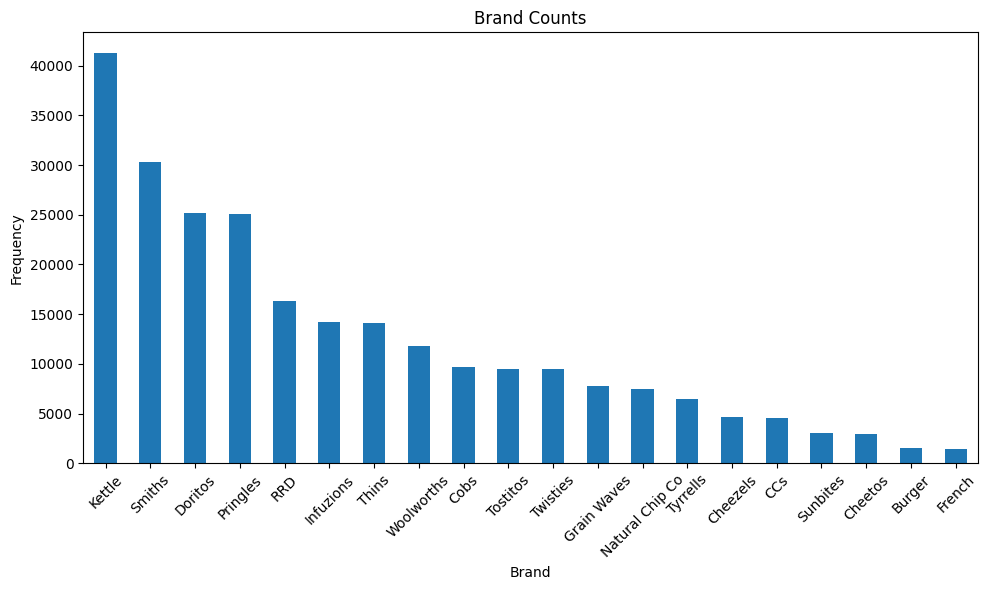

In [25]:
brand_counts = trans_df['BRAND'].value_counts()

# Plot the brand counts
brand_counts.plot(kind='bar', figsize=(10, 6))

# Add title and labels
plt.title('Brand Counts')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


### Customer Data

In [26]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
# Check null values
for col in cust_df.columns:
  print(f"Column '{col}': {cust_df[col].isnull().sum()} null values")

Column 'LYLTY_CARD_NBR': 0 null values
Column 'LIFESTAGE': 0 null values
Column 'PREMIUM_CUSTOMER': 0 null values


In [28]:
cust_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [29]:
# Check for duplicates in the LYLTY_CARD_NBR column
duplicates = cust_df[cust_df.duplicated('LYLTY_CARD_NBR')]

# Print the duplicate rows
print(duplicates)

# If you just want the count of duplicates:
print(f"Number of duplicate LYLTY_CARD_NBR: {duplicates.shape[0]}")

Empty DataFrame
Columns: [LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []
Number of duplicate LYLTY_CARD_NBR: 0


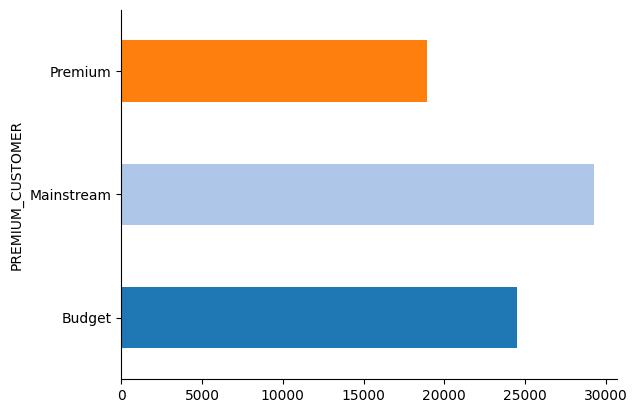

In [30]:
# Premium Customer Distribution
cust_df.groupby('PREMIUM_CUSTOMER').size().plot(kind='barh', color=sns.palettes.mpl_palette('tab20'))
plt.gca().spines[['top', 'right',]].set_visible(False)

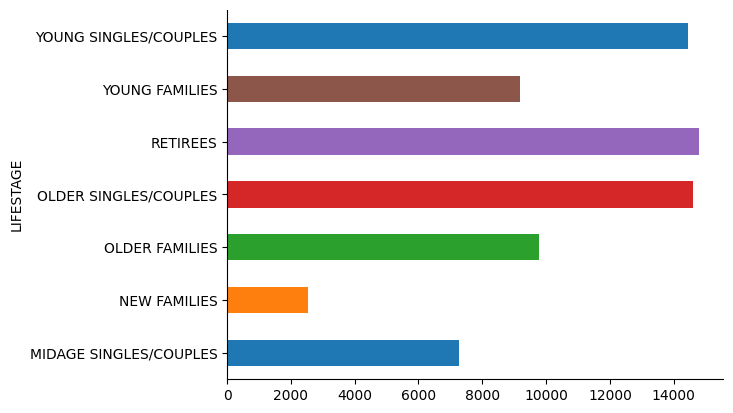

In [31]:
# Life Stage Distribution
cust_df.groupby('LIFESTAGE').size().plot(kind='barh', color=sns.palettes.mpl_palette('tab10'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Merge Data

In [32]:
# Merge transaction data to customer data
merged_df = trans_df.merge(cust_df, on='LYLTY_CARD_NBR', how='inner')

print(f"Number of rows in trans_df: {len(trans_df)}")
print(f"Number of rows in merged_df: {len(merged_df)}")

Number of rows in trans_df: 246740
Number of rows in merged_df: 246740


As the number of rows in `data` is the same as that of `transactionData`, we can be
sure that no duplicates were created.

In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PACK_SIZE         246740 non-null  float64       
 9   BRAND             246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 22.6+ MB


In [34]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


Great, there are no nulls! So all our customers in the transaction data has been
accounted for in the customer dataset.

In [35]:
# Save dataset as a csv
merged_df.to_csv('merged_dataset.csv', index=False)

## Data Analysis on Customer Segments

### Total Sales

<ipython-input-36-d6a92811ce7e>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = sales / total_sales[j] * 100


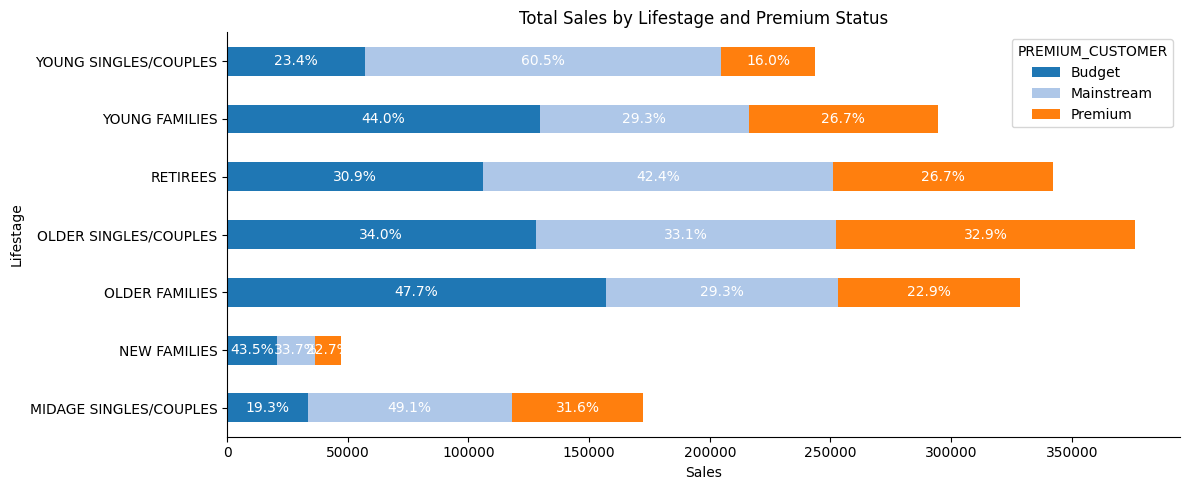

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 5))

# Calculate the sum of TOT_SALES for each group
sales_distribution = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()

# Plot the stacked bar chart
sales_distribution.plot(kind='barh', stacked=True, color=sns.palettes.mpl_palette('tab20'), ax=ax)

# Calculate total sales for each life stage
total_sales = sales_distribution.sum(axis=1)

# Annotate each bar segment with the percentage of total sales
for i, bars in enumerate(ax.containers):
    for j, bar in enumerate(bars):
        sales = bar.get_width()
        if sales > 0:
            # Calculate the percentage of the total sales
            percentage = sales / total_sales[j] * 100
            # Annotate with percentage
            ax.text(bar.get_x() + sales / 2, bar.get_y() + bar.get_height() / 2,
                    f'{percentage:.1f}%', ha='center', va='center', color='white')

# Style the plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Sales')
ax.set_ylabel('Lifestage')
ax.set_title('Total Sales by Lifestage and Premium Status')

plt.tight_layout()
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees.

Let's see if the higher sales are due to there being more customers who buy chips.

### Number of Customers

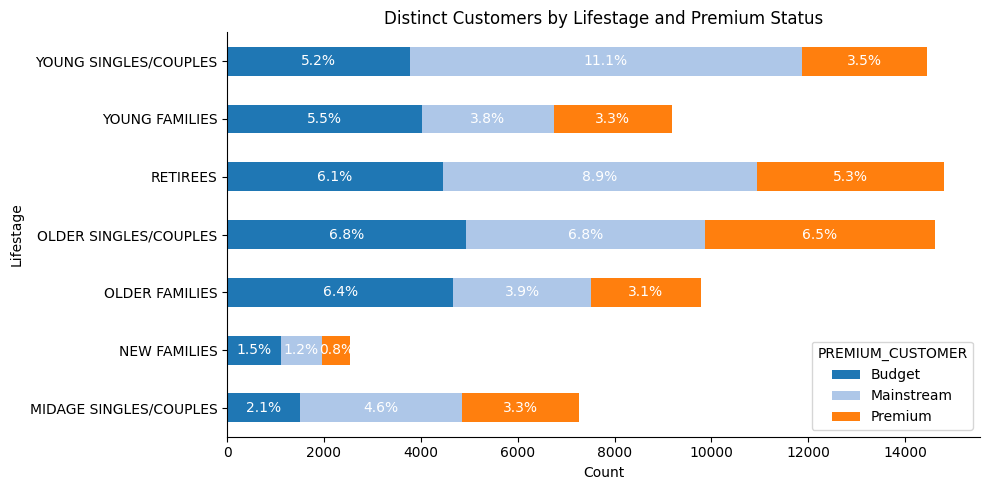

In [37]:
unique_counts = cust_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().unstack()

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the stacked bar chart
unique_counts.plot(kind='barh', stacked=True, color=sns.palettes.mpl_palette('tab20'), ax=ax)

# Calculate the total number of unique customers
total_customers = unique_counts.values.sum()

# Annotate each bar segment with the percentage of total customers
for i, bars in enumerate(ax.containers):
    for j, bar in enumerate(bars):
        count = bar.get_width()
        if count > 0:
            # Calculate the percentage of the total customers
            percentage = count / total_customers * 100
            # Annotate with percentage
            ax.text(bar.get_x() + count / 2, bar.get_y() + bar.get_height() / 2,
                    f'{percentage:.1f}%', ha='center', va='center', color='white')

# Style the plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Count')
ax.set_ylabel('Lifestage')
ax.set_title('Distinct Customers by Lifestage and Premium Status')

plt.tight_layout()
plt.show()


There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.

In [38]:
# Create a DataFrame that includes the counts and percentage of total customers
summary_table = unique_counts.stack().reset_index()
summary_table.columns = ['Lifestage', 'Premium Customer', 'Customer Count']

# Print the table
print(summary_table)

                 Lifestage Premium Customer  Customer Count
0   MIDAGE SINGLES/COUPLES           Budget            1504
1   MIDAGE SINGLES/COUPLES       Mainstream            3340
2   MIDAGE SINGLES/COUPLES          Premium            2431
3             NEW FAMILIES           Budget            1112
4             NEW FAMILIES       Mainstream             849
5             NEW FAMILIES          Premium             588
6           OLDER FAMILIES           Budget            4675
7           OLDER FAMILIES       Mainstream            2831
8           OLDER FAMILIES          Premium            2274
9    OLDER SINGLES/COUPLES           Budget            4929
10   OLDER SINGLES/COUPLES       Mainstream            4930
11   OLDER SINGLES/COUPLES          Premium            4750
12                RETIREES           Budget            4454
13                RETIREES       Mainstream            6479
14                RETIREES          Premium            3872
15          YOUNG FAMILIES           Bud

Higher sales may also be driven by more units of chips being bought per customer.
Let's have a look at this next.

### Average Products Purchased

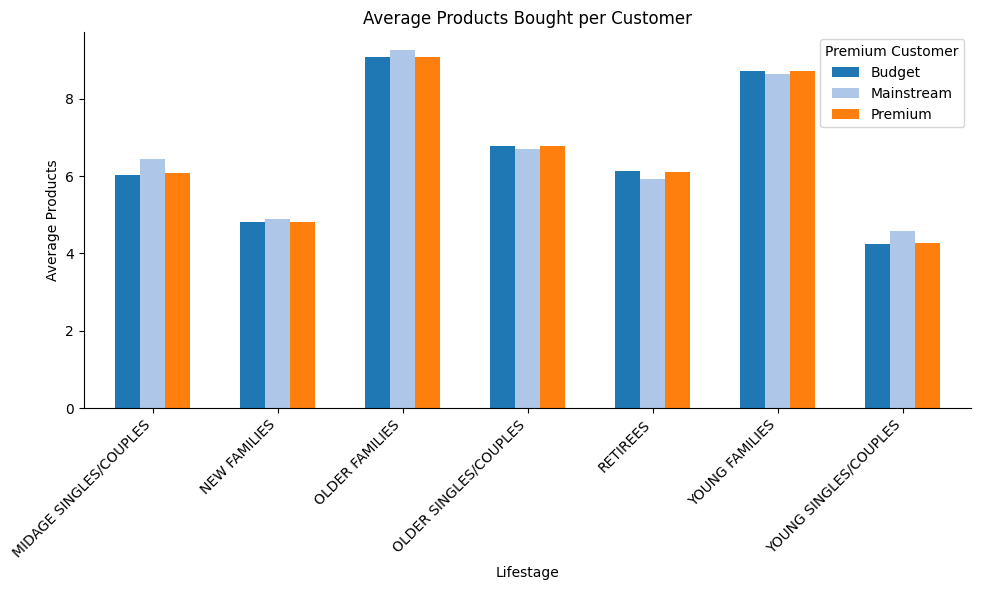

In [39]:
# Step 1: Calculate total products bought per customer
customer_totals = merged_df.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

# Step 2: Calculate the average products bought per customer for each LIFESTAGE and PREMIUM_CUSTOMER combination
average_products = customer_totals.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().unstack()

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
average_products.plot(kind='bar', ax=ax, width=0.6, color=sns.color_palette(palette='tab20'))

# Style the plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Average Products Bought per Customer')
ax.set_xlabel('Lifestage')
ax.set_ylabel('Average Products')
ax.legend(title='Premium Customer')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

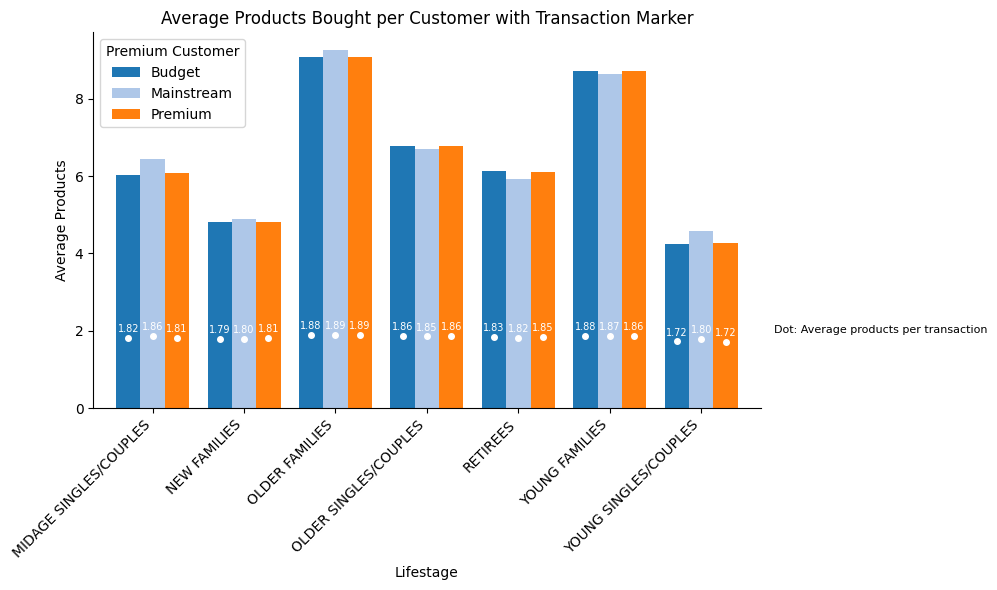

In [40]:
# Step 1: Group by customer and compute totals and transaction counts
customer_totals = merged_df.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_qty=('PROD_QTY', 'sum'),
    total_txns=('TXN_ID', 'nunique')
).reset_index()

# Step 2: Calculate the average products per transaction per customer
customer_totals['products_per_transaction'] = customer_totals['total_qty'] / customer_totals['total_txns']

# Step 3: Group by LIFESTAGE and PREMIUM_CUSTOMER to calculate the dot values
dot_values = customer_totals.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    avg_products_per_transaction=('products_per_transaction', 'sum'),
    total_customers=('LYLTY_CARD_NBR', 'count')
)
dot_values['dot_value'] = dot_values['avg_products_per_transaction'] / dot_values['total_customers']

# Step 4: Prepare data for plotting the bars
average_products = customer_totals.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['total_qty'].mean().unstack()

# Step 5: Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
average_products.plot(kind='bar', ax=ax, width=0.8, color=sns.palettes.mpl_palette('tab20'))

# Step 6: Overlay the dots
for premium_group, bars in enumerate(ax.containers):
    for bar_index, bar in enumerate(bars):
        lifestage = average_products.index[bar_index]
        premium_customer = average_products.columns[premium_group]

        # Retrieve the correct dot value
        dot_value = dot_values.loc[(lifestage, premium_customer), 'dot_value']

        # Add a dot at the correct height
        bar_x = bar.get_x() + bar.get_width() / 2
        ax.plot(bar_x, dot_value, 'o', color='white', markersize=4)

        # Add the dot value as text above the dot
        ax.text(bar_x, dot_value + 0.1, f'{dot_value:.2f}', ha='center', va='bottom', color='white', fontsize=7)

# Style the plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Average Products Bought per Customer with Transaction Marker')
ax.set_xlabel('Lifestage')
ax.set_ylabel('Average Products')
ax.legend(title='Premium Customer')
ax.text(1.02, 0.2, 'Dot: Average products per transaction',
        transform=ax.transAxes, ha='left', fontsize=8, color='black', rotation=0)
plt.xticks(rotation=45, ha='right')

# Add a note above the plot


plt.tight_layout()
plt.show()

Older families and young families in general buy more chips per customer.

Let's also investigate the average price per unit chips bought for each customer
segment as this is also a driver of total sales.

### Average Price of product purchased

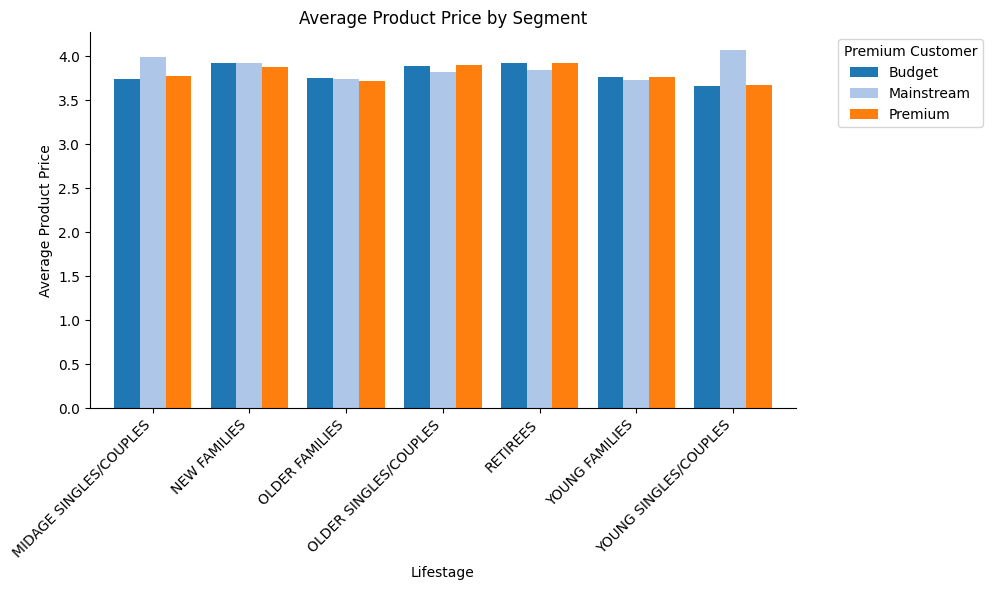

In [41]:
# Step 1: Compute average product price for each segment
merged_df['product_price'] = merged_df['TOT_SALES'] / merged_df['PROD_QTY']
average_price_per_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['product_price'].mean().unstack()

# Step 2: Plot the average price
fig, ax = plt.subplots(figsize=(10, 6))
average_price_per_segment.plot(kind='bar', ax=ax, width=0.8, color=sns.palettes.mpl_palette('tab20'))

# Style the plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Average Product Price by Segment')
ax.set_xlabel('Lifestage')
ax.set_ylabel('Average Product Price')
ax.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Surprisingly, mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.


As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [42]:
from scipy.stats import ttest_ind_from_stats

# Step 1: Aggregate to customer level and calculate average price per customer
customer_level_data = merged_df.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_sales=('TOT_SALES', 'sum'),
    total_qty=('PROD_QTY', 'sum')
).reset_index()

# Calculate the average price per customer
customer_level_data['avg_product_price'] = customer_level_data['total_sales'] / customer_level_data['total_qty']

# Step 2: Calculate standard deviation of average prices for each segment
customer_std = customer_level_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['avg_product_price'].std()

# Step 3: Get distinct customer counts per segment
customer_counts = unique_counts.stack()

# Function to perform t-test
def compute_ttest(mean1, mean2, std1, std2, n1, n2):
    return ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2, equal_var=False).pvalue

# Define segment pairs for comparison
segment_pairs = [
    ('MIDAGE SINGLES/COUPLES', 'Mainstream', 'Premium'),
    ('MIDAGE SINGLES/COUPLES', 'Mainstream', 'Budget'),
    ('YOUNG SINGLES/COUPLES', 'Mainstream', 'Premium'),
    ('YOUNG SINGLES/COUPLES', 'Mainstream', 'Budget')
]

# Compute p-values for each pair
for segment, group1, group2 in segment_pairs:
    mean1, mean2 = average_price_per_segment.loc[segment, [group1, group2]]
    std1, std2 = customer_std.loc[segment, [group1, group2]]
    n1, n2 = customer_counts.loc[segment, [group1, group2]]

    p_value = compute_ttest(mean1, mean2, std1, std2, n1, n2)
    print(f"Pair ({group1} vs {group2} in {segment}) p-value: {p_value}")

Pair (Mainstream vs Premium in MIDAGE SINGLES/COUPLES) p-value: 5.019319854653061e-25
Pair (Mainstream vs Budget in MIDAGE SINGLES/COUPLES) p-value: 2.785681680258931e-23
Pair (Mainstream vs Premium in YOUNG SINGLES/COUPLES) p-value: 1.5650195138144588e-80
Pair (Mainstream vs Budget in YOUNG SINGLES/COUPLES) p-value: 3.188701213697635e-117


The t-test results in all p-value lower than 0.05, which means that the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget and premium, young and midage singles and couples.

###  Deep dive into Mainstream, young singles/couples

We might want to target customer segments that contribute the most to sales to
retain them or further increase sales. Let's look at Mainstream - young
singles/couples.

In this section, we will focus on analysing brand and pack size tendency of this group using affinity index.

It is a metric used to measure how closely a target audience is related to a brand, product, or service. It compares the percentage of a target group that interacts with a brand to the percentage of the general population that interacts with the same brand. Values above 100 indicate a higher affinity and values below 100 indicate a lower affinity.

#### Brand tendency

In [43]:
mark_df = merged_df.copy()

# Mark transactions by target group
mark_df['Target'] = (mark_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (mark_df['PREMIUM_CUSTOMER'] == 'Mainstream')

# Compute counts for each group and total
grouped = mark_df.groupby(['BRAND', 'Target']).size().unstack(fill_value=0)
total_counts = grouped.sum(axis=1)
target_counts = grouped.loc[:, True]
other_counts = grouped.loc[:, False]

# Compute total transactions for each group
total_target_transactions = target_counts.sum()
total_population_transactions = total_counts.sum()

# Compute percentages and affinity index
target_percentage = target_counts / total_target_transactions
population_percentage = total_counts / total_population_transactions
affinity_index = (target_percentage / population_percentage) * 100

# Create result DataFrame
result = pd.DataFrame({
    'Brand': total_counts.index,
    'Target Interest': target_percentage,
    'Other Interest': other_counts / (total_population_transactions - total_target_transactions),
    'Affinity Index': affinity_index
}).reset_index(drop=True)

result.sort_values('Affinity Index', ascending=False, inplace=True)

result

,Brand,Target Interest,Other Interest,Affinity Index
18,Tyrrells,0.031672,0.025630,121.309841
17,Twisties,0.046050,0.037650,120.185761
5,Doritos,0.121725,0.100552,119.071162
16,Tostitos,0.045538,0.037769,118.637033
9,Kettle,0.196684,0.164809,117.539987
11,Pringles,0.118451,0.100297,116.431040
4,Cobs,0.044208,0.038861,112.533451
8,Infuzions,0.063958,0.057004,111.126386
7,Grain Waves,0.033054,0.031224,105.370166
15,Thins,0.059660,0.056819,104.586650


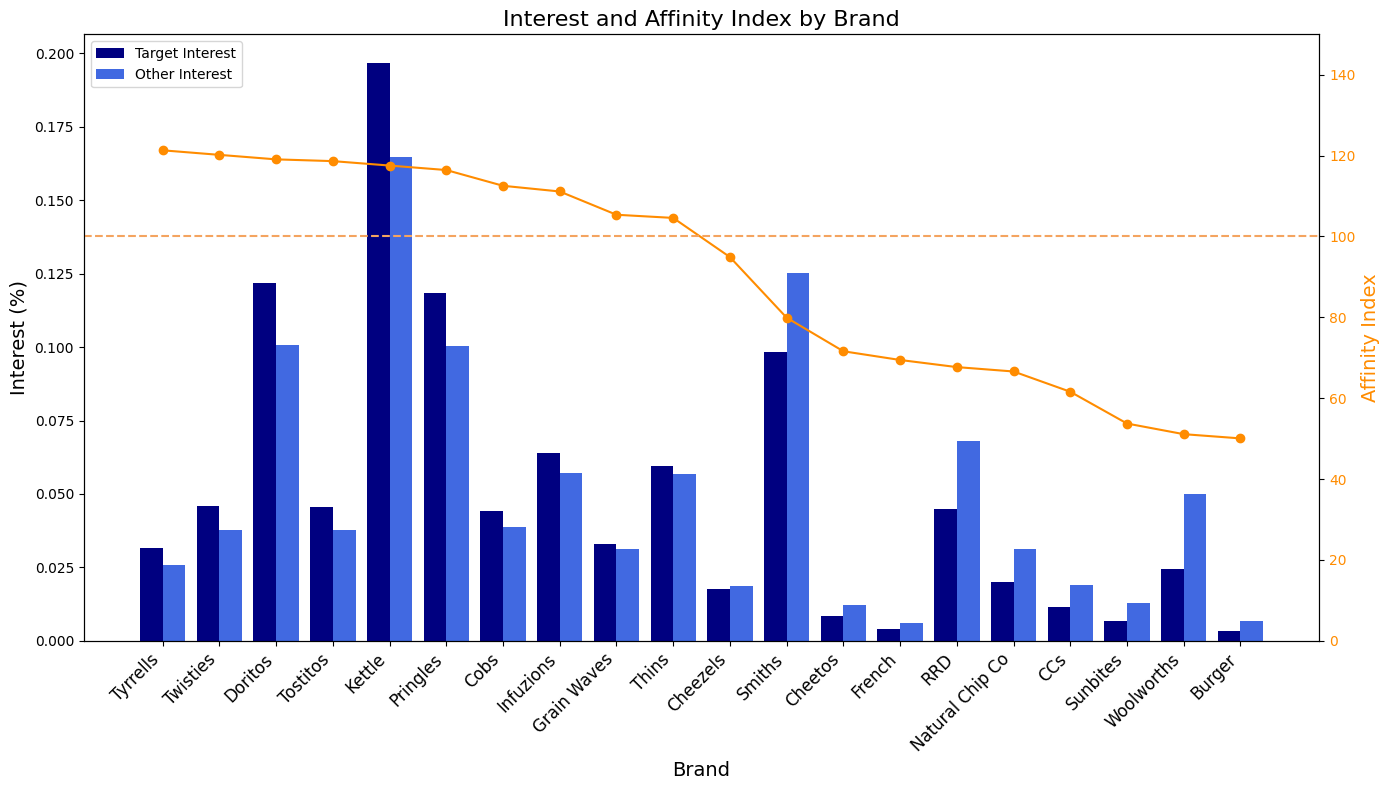

In [44]:
import numpy as np

# Create bar positions
x = np.arange(len(result['Brand']))

fig, ax1 = plt.subplots(figsize=(14, 8))

# Define bar width
bar_width = 0.4

# Plot Target and Other Interest on the primary y-axis
bar_target = ax1.bar(x - bar_width/2, result['Target Interest'], bar_width, label='Target Interest', color='navy')
bar_other = ax1.bar(x + bar_width/2, result['Other Interest'], bar_width, label='Other Interest', color='royalblue')

# Style the primary y-axis
ax1.set_xlabel('Brand', fontsize=14)
ax1.set_ylabel('Interest (%)', fontsize=14, color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(result['Brand'], rotation=45, ha='right', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

# Create secondary y-axis for Affinity Index
ax2 = ax1.twinx()
bar_affinity = ax2.plot(x, result['Affinity Index'], color='darkorange', marker='o', label='Affinity Index')

# Add horizontal line at Affinity Index = 100
ax2.axhline(y=100, color='sandybrown', linestyle='--', linewidth=1.5)

# Style the secondary y-axis
ax2.set_ylabel('Affinity Index', fontsize=14, color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
ax2.set_ylim(0, 150)

# Set title
plt.title('Interest and Affinity Index by Brand', fontsize=16)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

We can see that **Kettle** has the highest "Target Interest" among all brands, indicating that it is the most preferred brand among the target audience. This brand also has a high affinity index for our target group with 18% more likely to buy than other groups. **Doritos and Pringles** are also prefered brands and more attractive to our targeted group compared to others.

Moreover, **Tyrells**, though not being widely popular, has the highest affinity index. Those brands should be prioritized in marketing campaigns targeting this specific group, such as off-locating in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.

On the other hand, Smiths, RRD, and Woolworths have high "Other Interest" and low affinity index, suggesting that while they are popular among the general audience, they may not be as strongly preferred by the target group. Those brands might not be suitable for attracting this group.

#### Pack size tendency

In [45]:
# Compute counts for each group and total
grouped2 = mark_df.groupby(['PACK_SIZE', 'Target']).size().unstack(fill_value=0)
total_counts2 = grouped2.sum(axis=1)
target_counts2 = grouped2.loc[:, True]
other_counts2 = grouped2.loc[:, False]

# Compute total transactions for each group
total_target_transactions2 = target_counts2.sum()
total_population_transactions2 = total_counts2.sum()

# Compute percentages and affinity index
target_percentage2 = target_counts2 / total_target_transactions2
population_percentage2 = total_counts2 / total_population_transactions2
affinity_index2 = (target_percentage2 / population_percentage2) * 100

# Create result DataFrame
result = pd.DataFrame({
    'Pack Size': total_counts2.index,
    'Target Interest': target_percentage2,
    'Other Interest': other_counts2 / (total_population_transactions2 - total_target_transactions2),
    'Affinity Index': affinity_index2
}).reset_index(drop=True)

result.sort_values('Pack Size', ascending=True, inplace=True)

result

,Pack Size,Target Interest,Other Interest,Affinity Index
0,70.0,0.003223,0.006356,52.778058
1,90.0,0.006549,0.012676,53.722751
2,110.0,0.104943,0.089509,115.663377
3,125.0,0.003019,0.006140,51.228744
4,134.0,0.118451,0.100297,116.431040
5,135.0,0.014838,0.013059,112.410362
6,150.0,0.157593,0.163396,96.720462
7,160.0,0.006549,0.012509,54.410113
8,165.0,0.056386,0.062479,90.949734
9,170.0,0.080587,0.081023,99.505246


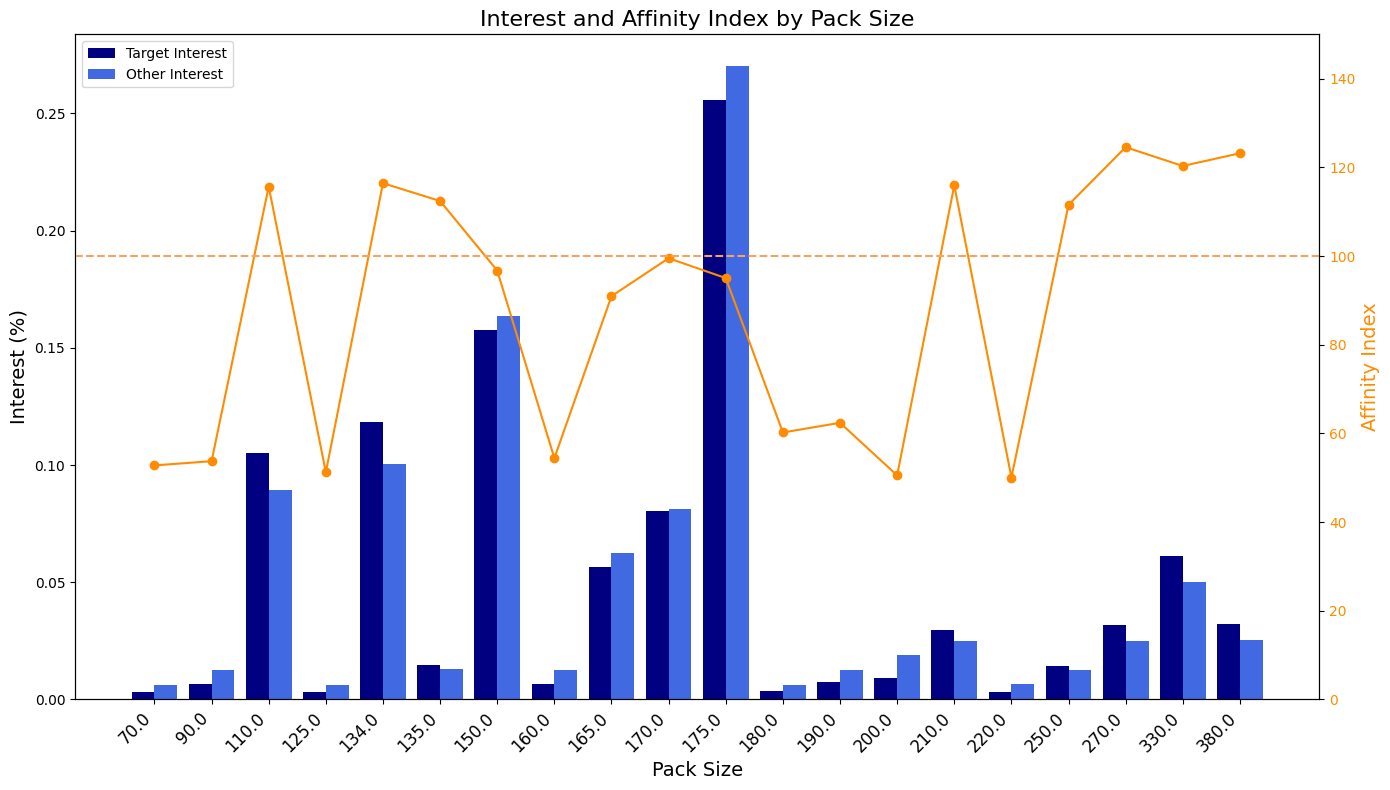

In [46]:
import numpy as np

# Create bar positions
x = np.arange(len(result['Pack Size']))

fig, ax1 = plt.subplots(figsize=(14, 8))

# Define bar width
bar_width = 0.4

# Plot Target and Other Interest on the primary y-axis
bar_target = ax1.bar(x - bar_width/2, result['Target Interest'], bar_width, label='Target Interest', color='navy')
bar_other = ax1.bar(x + bar_width/2, result['Other Interest'], bar_width, label='Other Interest', color='royalblue')

# Style the primary y-axis
ax1.set_xlabel('Pack Size', fontsize=14)
ax1.set_ylabel('Interest (%)', fontsize=14, color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(result['Pack Size'], rotation=45, ha='right', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

# Create secondary y-axis for Affinity Index
ax2 = ax1.twinx()
bar_affinity = ax2.plot(x, result['Affinity Index'], color='darkorange', marker='o', label='Affinity Index')

# Add horizontal line at Affinity Index = 100
ax2.axhline(y=100, color='sandybrown', linestyle='--', linewidth=1.5)

# Style the secondary y-axis
ax2.set_ylabel('Affinity Index', fontsize=14, color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
ax2.set_ylim(0, 150)

# Set title
plt.title('Interest and Affinity Index by Pack Size', fontsize=16)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

150g and 175g seem have the highest interest for both target and other groups, but a slightly low affinity index, indicating that even though these two pack sizes are widely popular, it might be more suitable for mass promotions and campaigns.

Instead, some smaller sizes including **110g and 134g** are 16% more attractive to our targeted group compared to others. These sizes might work well for targeted marketing campaigns.

Moreover, some bigger sizes (**270g, 330g, and 380g**) show lower interest but  have relatively high affinity of above 20%, indicating that they may be preferred by a more specific segment, such as couples.

## Conclusion

Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.

# Task 2: Experimentation and uplift testing

## Data Import

In [47]:
exp_df = pd.read_csv('/content/drive/MyDrive/Quantium/QVI_data.csv')

In [48]:
exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [49]:
exp_df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


## Select Control store

### Calculate metrics

For each store and month calculate total sales, number of customers,
transactions per customer, chips per customer and the average price per unit.

In [50]:
# Create MONTH column
exp_df['DATE'] = pd.to_datetime(exp_df['DATE'])
exp_df['MONTH'] = exp_df['DATE'].dt.strftime('%Y%m')
exp_df['MONTH'] = exp_df['MONTH'].astype(int)

In [51]:
# Group by store and month
grouped = exp_df.groupby(['STORE_NBR', 'MONTH'])

In [52]:
# Calculate metrics
metrics = grouped.agg(
    total_sales=('TOT_SALES', 'sum'),
    num_customers=('LYLTY_CARD_NBR', 'nunique'),
    total_transactions=('TXN_ID', 'nunique'),
    total_chips=('PROD_QTY', 'sum'),
)

metrics['avg_price_per_unit'] = metrics['total_sales'] / metrics['total_chips']
metrics['transactions_per_customer'] = metrics['total_transactions'] / metrics['num_customers']
metrics['chips_per_customer'] = metrics['total_chips'] / metrics['num_customers']

# Drop intermediate columns
metrics = metrics.drop(columns=['total_transactions', 'total_chips'])

# Reset the index if desired
metrics = metrics.reset_index()

metrics

,STORE_NBR,MONTH,total_sales,num_customers,avg_price_per_unit,transactions_per_customer,chips_per_customer
0,1,201807,206.9,49,3.337097,1.061224,1.265306
1,1,201808,176.1,42,3.261111,1.023810,1.285714
2,1,201809,278.8,59,3.717333,1.050847,1.271186
3,1,201810,188.1,44,3.243103,1.022727,1.318182
4,1,201811,192.6,46,3.378947,1.021739,1.239130
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,4.346154,1.066667,2.022222
3165,272,201903,442.3,50,4.379208,1.060000,2.020000
3166,272,201904,445.1,54,4.239048,1.018519,1.944444
3167,272,201905,314.6,34,4.430986,1.176471,2.088235


We need to filter to the pre-trial period and stores with full observation periods stores

In [53]:
# Identify stores with full observations (12 unique months)
qualified_stores = (
    metrics.groupby('STORE_NBR')
    .filter(lambda x: x['MONTH'].nunique() == 12)
    ['STORE_NBR']
    .unique()
)

In [54]:
# Count of unique stores before filtering
unique_stores_before = metrics['STORE_NBR'].nunique()

# Count of unique stores after filtering
unique_stores_after = len(qualified_stores)

# Print the results
print(f"Unique stores before filtering: {unique_stores_before}")
print(f"Unique stores after filtering: {unique_stores_after}")

Unique stores before filtering: 272
Unique stores after filtering: 260


In [55]:
# Filter to the pre-trial period
pre_trial_measures = metrics[
    (metrics['MONTH'] < 201902) &
    (metrics['STORE_NBR'].isin(qualified_stores))
]

In [56]:
pre_trial_measures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1820 entries, 0 to 3163
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STORE_NBR                  1820 non-null   int64  
 1   MONTH                      1820 non-null   int64  
 2   total_sales                1820 non-null   float64
 3   num_customers              1820 non-null   int64  
 4   avg_price_per_unit         1820 non-null   float64
 5   transactions_per_customer  1820 non-null   float64
 6   chips_per_customer         1820 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 113.8 KB


### Correlation function

Now we need to work out a way of ranking how similar each potential control store is to the trial store. We can calculate how correlated the performance of each store is to the trial store.


In [57]:
def calculate_correlation(input_table, metric_col, store_comparison):
    # Extract unique store numbers
    store_numbers = input_table['STORE_NBR'].unique()

    # Filter the input table for the trial store
    trial_store_data = input_table[input_table['STORE_NBR'] == store_comparison]

    # Initialize a list to store results
    calc_corr_table = []

    # Loop through each store to calculate correlation
    for store in store_numbers:
        if store == store_comparison:
            continue  # Skip the trial store itself

        # Filter the input table for the current control store
        control_store_data = input_table[input_table['STORE_NBR'] == store]

        # Merge data on a common key to align for correlation
        aligned_data = trial_store_data[['MONTH', metric_col]].merge(
            control_store_data[['MONTH', metric_col]],
            on='MONTH',
            suffixes=('_trial', '_control')
        )

        # Calculate the Pearson correlation
        if not aligned_data.empty:
            correlation = aligned_data[f'{metric_col}_trial'].corr(aligned_data[f'{metric_col}_control'])
        else:
            correlation = None  # No correlation if no common data

        # Store the result
        calc_corr_table.append({
            'Store1': store_comparison,
            'Store2': store,
            'corr_measure': correlation
        })

    # Convert the result to a DataFrame
    calc_corr_df = pd.DataFrame(calc_corr_table)
    return calc_corr_df

### Magnitude distance function

Apart from correlation, we can also calculate a standardised metric based on the
absolute difference between the trial store's performance and each control store's performance.


In [58]:
def calculate_magnitude_distance(input_table, metric_col, store_comparison):
    # Extract unique store numbers
    store_numbers = input_table['STORE_NBR'].unique()

    # Initialize an empty list to store results
    calc_dist_table = []

    # Loop through each store to calculate absolute differences
    for store in store_numbers:
        # Filter data for the trial store and the current control store
        trial_store_data = input_table[input_table['STORE_NBR'] == store_comparison]
        control_store_data = input_table[input_table['STORE_NBR'] == store]

        # Merge on YEARMONTH to ensure alignment
        aligned_data = trial_store_data[['MONTH', metric_col]].merge(
            control_store_data[['MONTH', metric_col]],
            on='MONTH',
            suffixes=('_trial', '_control')
        )

        # Calculate absolute difference
        aligned_data['measure'] = np.abs(aligned_data[f'{metric_col}_trial'] - aligned_data[f'{metric_col}_control'])

        # Append results to list
        for _, row in aligned_data.iterrows():
            calc_dist_table.append({
                'Store1': store_comparison,
                'Store2': store,
                'MONTH': row['MONTH'],
                'measure': row['measure']
            })

    # Convert list to DataFrame
    calc_dist_df = pd.DataFrame(calc_dist_table)

    # Standardize the magnitude distances
    min_max_dist = calc_dist_df.groupby(['Store1', 'MONTH'])['measure'].agg(['min', 'max']).reset_index()
    min_max_dist.rename(columns={'min': 'minDist', 'max': 'maxDist'}, inplace=True)

    # Merge min/max distances back into the main DataFrame
    dist_table = calc_dist_df.merge(min_max_dist, on=['Store1', 'MONTH'])

    # Calculate standardized magnitude measure (scaled from 0 to 1)
    dist_table['magnitudeMeasure'] = 1 - ((dist_table['measure'] - dist_table['minDist']) / (dist_table['maxDist'] - dist_table['minDist']))

    # Average the standardized measure for each Store1-Store2 pair
    final_dist_table = dist_table.groupby(['Store1', 'Store2'])['magnitudeMeasure'].mean().reset_index()
    final_dist_table.rename(columns={'magnitudeMeasure': 'mag_measure'}, inplace=True)

    return final_dist_table

### Rank and select control stores

Now let's use the functions to find the control stores! We'll select control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores. So we will need to use our functions to get four scores, two for each of total sales and total customers.

In [59]:
# Creat a list of trial store IDs
trial_stores = [77, 86, 88]

# Initialize a DataFrame to store all results
all_scores = []

# Loop through each trial store
for trial_store in trial_stores:
    # Correlation scores
    sales_corr = calculate_correlation(pre_trial_measures, 'total_sales', trial_store)
    customers_corr = calculate_correlation(pre_trial_measures, 'num_customers', trial_store)

    # Magnitude distance scores
    sales_mag_dist = calculate_magnitude_distance(pre_trial_measures, 'total_sales', trial_store)
    customers_mag_dist = calculate_magnitude_distance(pre_trial_measures, 'num_customers', trial_store)

    # Combine the scores into a single DataFrame
    combined_scores = (
        sales_corr.merge(customers_corr, on=['Store1', 'Store2'], suffixes=('_sales_corr', '_customers_corr'))
        .merge(sales_mag_dist, on=['Store1', 'Store2'])
        .merge(customers_mag_dist, on=['Store1', 'Store2'], suffixes=('_sales_mag', '_customers_mag'))
    )

    # Add trial store column
    combined_scores['Trial_Store'] = trial_store

    # Append to the list
    all_scores.append(combined_scores)

# Combine all scores into a single DataFrame
all_scores_df = pd.concat(all_scores, ignore_index=True)

all_scores_df

,Store1,Store2,corr_measure_sales_corr,corr_measure_customers_corr,mag_measure_sales_mag,mag_measure_customers_mag,Trial_Store
0,77,1,0.075218,0.322168,0.953285,0.940321,77
1,77,2,-0.263079,-0.572051,0.937579,0.924638,77
2,77,3,0.806644,0.834207,0.354315,0.345067,77
3,77,4,-0.263300,-0.295639,0.177135,0.189579,77
4,77,5,-0.110652,0.370659,0.553043,0.481199,77
...,...,...,...,...,...,...,...
772,88,268,-0.021429,0.672672,0.160968,0.335512,88
773,88,269,-0.172578,-0.274781,0.709806,0.847040,88
774,88,270,-0.723272,-0.103032,0.714835,0.833427,88
775,88,271,-0.103037,-0.018831,0.613314,0.738290,88


We'll need to combine the all the scores calculated using our function to create a composite score to rank on. Let's take a simple average of the correlation and magnitude scores for each driver.

In [60]:
all_scores_df['composite_score'] = (
    all_scores_df['corr_measure_sales_corr'] +
    all_scores_df['corr_measure_customers_corr'] +
    all_scores_df['mag_measure_sales_mag'] +
    all_scores_df['mag_measure_customers_mag']
) / 4

ranked_scores = all_scores_df.sort_values(['Trial_Store', 'composite_score'], ascending=[True, False])

ranked_scores

,Store1,Store2,corr_measure_sales_corr,corr_measure_customers_corr,mag_measure_sales_mag,mag_measure_customers_mag,Trial_Store,composite_score
220,77,233,0.903774,0.990358,0.985265,0.992773,77,0.968043
38,77,41,0.783232,0.844219,0.965140,0.974639,77,0.891808
15,77,17,0.842668,0.747308,0.880688,0.962495,77,0.858290
240,77,254,0.577108,0.916208,0.922771,0.937131,77,0.838305
107,77,115,0.689159,0.718882,0.932832,0.965916,77,0.826697
...,...,...,...,...,...,...,...,...
601,88,90,-0.662427,-0.503735,0.181835,0.322986,88,-0.165335
762,88,258,0.087493,-0.825850,0.014645,0.017773,88,-0.176485
650,88,141,-0.690590,-0.547399,0.201183,0.299814,88,-0.184248
744,88,239,-0.642329,-0.660672,0.253424,0.304303,88,-0.186319


In [61]:
# Select the top control store for each trial store
top_control_stores = ranked_scores.groupby('Trial_Store').first().reset_index()

print("Top control stores for each trial store:")
print(top_control_stores[['Trial_Store', 'Store2', 'composite_score']])

Top control stores for each trial store:
   Trial_Store  Store2  composite_score
0           77     233         0.968043
1           86     155         0.942190
2           88     237         0.799867


### Check on pair performance

Now that we have found a control store, let's check visually if the drivers are
indeed similar in the period before the trial.

In [146]:
def plot_pre_trial_measures_by_pair(pre_trial_measures, trial_control_pairs, metric_col, y_label, title_prefix, ylim=None):
    for trial_store, control_store in trial_control_pairs:
        plt.figure(figsize=(8,5))

        # Filter pre-trial data for trial and control stores
        trial_data = pre_trial_measures[pre_trial_measures['STORE_NBR'] == trial_store].sort_values(by='MONTH')
        control_data = pre_trial_measures[pre_trial_measures['STORE_NBR'] == control_store].sort_values(by='MONTH')

        # Plot trial store data
        plt.plot(trial_data['MONTH'].astype(str), trial_data[metric_col], label=f'Trial Store {trial_store}', marker='o')

        # Plot control store data
        plt.plot(control_data['MONTH'].astype(str), control_data[metric_col], label=f'Control Store {control_store}', marker='o')

        # Customize the plot
        plt.title(f"{title_prefix} (Trial: {trial_store}, Control: {control_store})")
        plt.xlabel('Month')
        plt.ylabel(y_label)
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid()

        if ylim:
            plt.ylim(ylim)

        # Show the plot
        plt.tight_layout()
        plt.show()

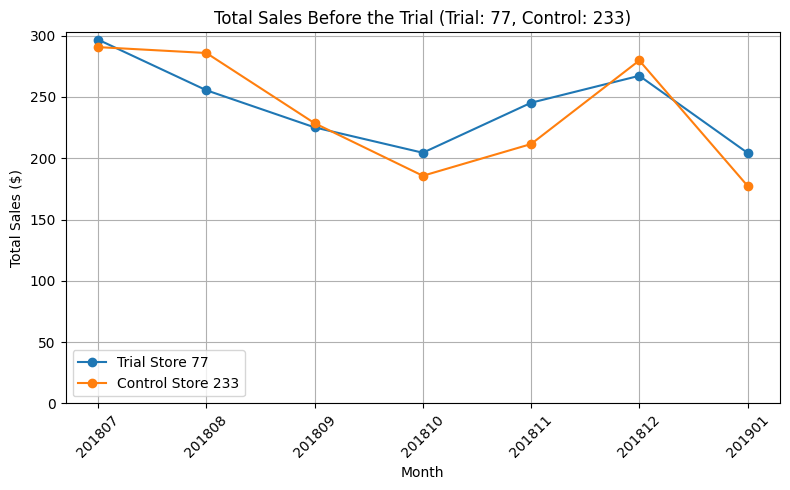

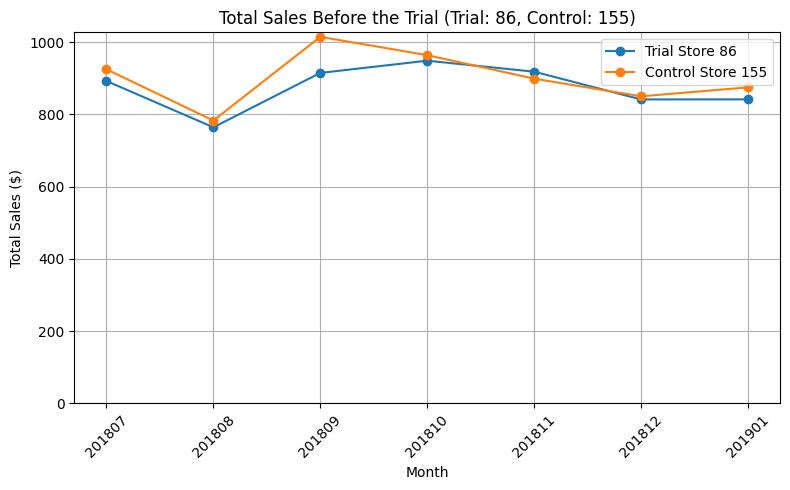

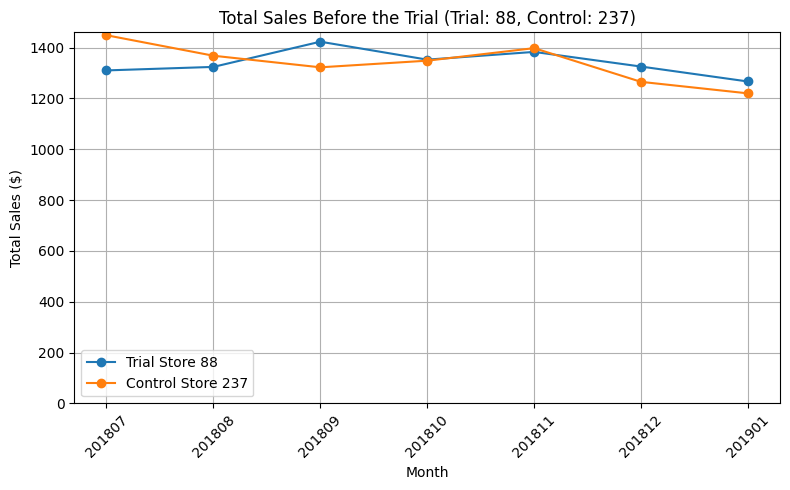

In [151]:
# Define the trial-control store pairs
trial_control_pairs = [(77, 233), (86, 155), (88, 237)]

# Plot total sales over time for each pair
plot_pre_trial_measures_by_pair(pre_trial_measures, trial_control_pairs, 'total_sales',
                                'Total Sales ($)', 'Total Sales Before the Trial', ylim=(0,None))

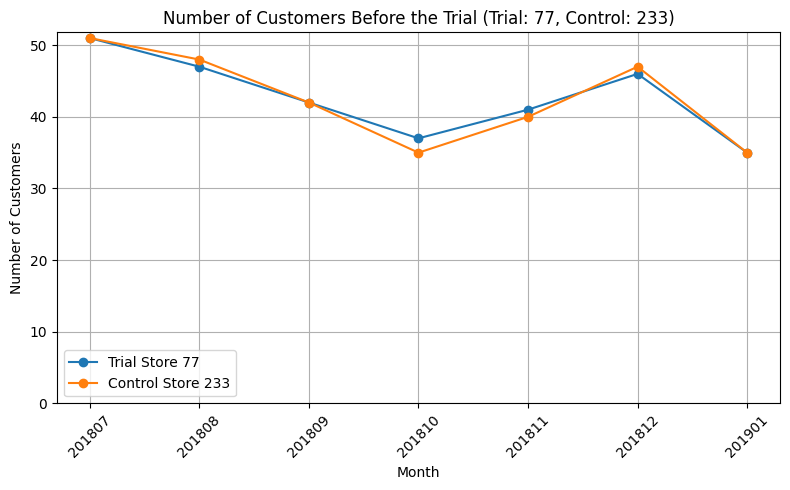

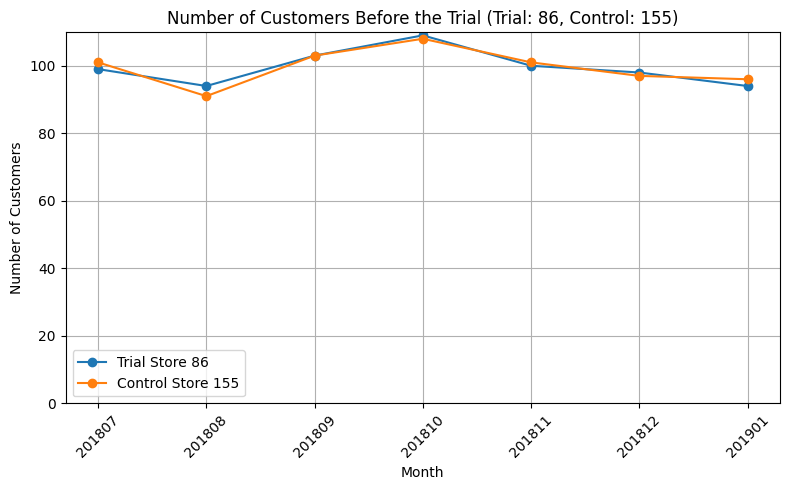

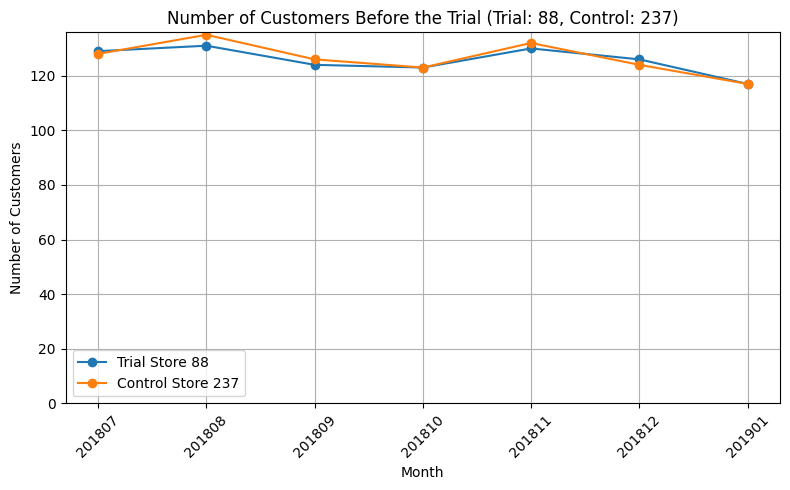

In [148]:
# Plot number of customers over time for each pair
plot_pre_trial_measures_by_pair(pre_trial_measures, trial_control_pairs, 'num_customers',
                                'Number of Customers', 'Number of Customers Before the Trial', ylim=(0,None))

We can see the same patterns in Total Sales and Number of Customers between Trial and Control Stores. It suggests that the selecting rules are working well.

## Assesment of Trial

The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales and number of customers.

### Trial 77 vs. Control 233

In [64]:
# Define the trial and control store numbers
trial_store = 77
control_store = 233

#### Compare sales during the trial period

In [65]:
# Compute the scaling factor using pre-trial data (before February 2019)
pre_trial_sales_trial = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) &
                                           (pre_trial_measures['MONTH'] < 201902)]['total_sales'].sum()

pre_trial_sales_control = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) &
                                             (pre_trial_measures['MONTH'] < 201902)]['total_sales'].sum()

# Compute scaling factor
scaling_factor_for_control_sales = pre_trial_sales_trial / pre_trial_sales_control

In [66]:
# Apply the scaling factor to control store sales in the full dataset
metrics_sales = metrics.copy()
metrics_sales.loc[metrics_sales['STORE_NBR'] == control_store, 'scaled_control_sales'] = \
    metrics_sales.loc[metrics_sales['STORE_NBR'] == control_store, 'total_sales'] * scaling_factor_for_control_sales

metrics_sales

,STORE_NBR,MONTH,total_sales,num_customers,avg_price_per_unit,transactions_per_customer,chips_per_customer,scaled_control_sales
0,1,201807,206.9,49,3.337097,1.061224,1.265306,NaN
1,1,201808,176.1,42,3.261111,1.023810,1.285714,NaN
2,1,201809,278.8,59,3.717333,1.050847,1.271186,NaN
3,1,201810,188.1,44,3.243103,1.022727,1.318182,NaN
4,1,201811,192.6,46,3.378947,1.021739,1.239130,NaN
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,4.346154,1.066667,2.022222,NaN
3165,272,201903,442.3,50,4.379208,1.060000,2.020000,NaN
3166,272,201904,445.1,54,4.239048,1.018519,1.944444,NaN
3167,272,201905,314.6,34,4.430986,1.176471,2.088235,NaN


In [72]:
# Ensure we are only comparing trial and control stores
trial_store_data = metrics_sales[metrics_sales['STORE_NBR'] == trial_store]
control_store_data = metrics_sales[metrics_sales['STORE_NBR'] == control_store]

# Merge trial and control data to ensure alignment
comparison_df = trial_store_data[['MONTH', 'STORE_NBR', 'total_sales']].merge(
    control_store_data[['MONTH', 'STORE_NBR', 'scaled_control_sales']],
    on='MONTH',
    how='left'
)

# Calculate percentage difference
comparison_df['percentage_difference'] = (
    (comparison_df['total_sales'] - comparison_df['scaled_control_sales']) /
    comparison_df['scaled_control_sales']
) * 100

In [73]:
comparison_df.rename(columns={'STORE_NBR_x': 'trial_store'}, inplace=True)
comparison_df.rename(columns={'STORE_NBR_y': 'control_store'}, inplace=True)
comparison_df.rename(columns={'total_sales': 'trial_store_sales'}, inplace=True)


comparison_df

,MONTH,trial_store,trial_store_sales,control_store,scaled_control_sales,percentage_difference
0,201807,77,296.8,233,297.565550,-0.257271
1,201808,77,255.5,233,292.652187,-12.694997
2,201809,77,225.2,233,233.998916,-3.760238
3,201810,77,204.5,233,190.085733,7.583035
4,201811,77,245.3,233,216.597421,13.251579
5,201812,77,267.3,233,286.408121,-6.671641
6,201901,77,204.4,233,181.692071,12.498029
7,201902,77,235.0,233,249.762622,-5.910661
8,201903,77,278.5,233,203.802205,36.652103
9,201904,77,263.5,233,162.345704,62.307960


In [74]:
import scipy.stats as stats
from IPython.display import display

# Calculate the standard deviation of percentage difference in the pre-trial period
pre_trial_diff = comparison_df[comparison_df['MONTH'] < 201902]['percentage_difference']
std_dev = np.std(pre_trial_diff, ddof=1)  # Using ddof=1 for sample standard deviation

# Degrees of Freedom (df = number of pre-trial months - 1)
degrees_of_freedom = len(pre_trial_diff) - 1

In [75]:
# Calculate t-values for trial period months
trial_period = comparison_df[comparison_df['MONTH'].isin([201902, 201903, 201904])].copy()
trial_period['t_value'] = trial_period['percentage_difference'] / std_dev  # Null hypothesis mean (mu) is 0

# Find the critical t-value for 95% confidence level
critical_t_value = stats.t.ppf(0.975, degrees_of_freedom)  # Two-tailed test

# Determine statistical significance (if |t-value| > critical value)
trial_period['is_significant'] = abs(trial_period['t_value']) > critical_t_value

# Display results
display(trial_period[['MONTH', 'percentage_difference', 't_value', 'is_significant']])

# Print summary
print(f"Standard Deviation of Pre-Trial Percentage Difference: {std_dev:.4f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"Critical t-value (95% confidence level): {critical_t_value:.4f}")

,MONTH,percentage_difference,t_value,is_significant
7,201902,-5.910661,-0.593520,False
8,201903,36.652103,3.680430,True
9,201904,62.307960,6.256669,True


Standard Deviation of Pre-Trial Percentage Difference: 9.9586
Degrees of Freedom: 6
Critical t-value (95% confidence level): 2.4469


We can observe that the t-value is much larger than the 95th percentile value of
the t-distribution for March and April, which means the increase in sales in the trial store in March and April is statistically greater than in the control store.

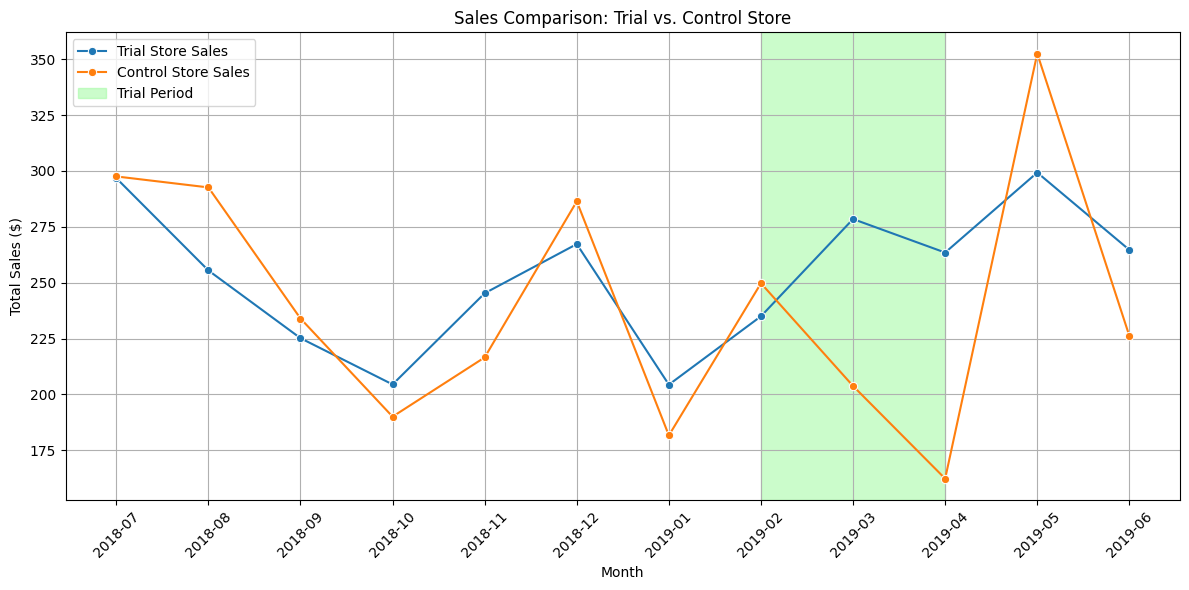

In [83]:
# Convert MONTH to a categorical variable for clear x-axis labeling
comparison_df['Transaction_Month'] = comparison_df['MONTH'].astype(str).str[:4] + "-" + comparison_df['MONTH'].astype(str).str[4:]

# Plot
plt.figure(figsize=(12, 6))

# Plot trial store sales
sns.lineplot(data=comparison_df, x='Transaction_Month', y='trial_store_sales', label='Trial Store Sales', marker='o')

# Plot control store sales
sns.lineplot(data=comparison_df, x='Transaction_Month', y='scaled_control_sales', label='Control Store Sales', marker='o')

# Highlight the Trial Period (Feb 2019 - April 2019)
plt.axvspan('2019-02', '2019-04', color='palegreen', alpha=0.5, label="Trial Period")

# Customize the plot
plt.title("Sales Comparison: Trial vs. Control Store")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Compare number of customers during the trial period

In [92]:
# Compute the scaling factor using pre-trial data (before February 2019)
pre_trial_num_customers_trial = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) &
                                           (pre_trial_measures['MONTH'] < 201902)]['num_customers'].sum()

pre_trial_num_customers_control = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) &
                                             (pre_trial_measures['MONTH'] < 201902)]['num_customers'].sum()

# Compute scaling factor
scaling_factor_for_control_num_customers = pre_trial_num_customers_trial / pre_trial_num_customers_control

In [93]:
# Apply the scaling factor to control store number of customers in the full dataset
metrics_num_customers = metrics.copy()
metrics_num_customers.loc[metrics_num_customers['STORE_NBR'] == control_store, 'scaled_control_num_customers'] = \
    metrics_num_customers.loc[metrics_num_customers['STORE_NBR'] == control_store, 'num_customers'] * scaling_factor_for_control_num_customers

metrics_num_customers

,STORE_NBR,MONTH,total_sales,num_customers,avg_price_per_unit,transactions_per_customer,chips_per_customer,scaled_control_num_customers
0,1,201807,206.9,49,3.337097,1.061224,1.265306,NaN
1,1,201808,176.1,42,3.261111,1.023810,1.285714,NaN
2,1,201809,278.8,59,3.717333,1.050847,1.271186,NaN
3,1,201810,188.1,44,3.243103,1.022727,1.318182,NaN
4,1,201811,192.6,46,3.378947,1.021739,1.239130,NaN
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,4.346154,1.066667,2.022222,NaN
3165,272,201903,442.3,50,4.379208,1.060000,2.020000,NaN
3166,272,201904,445.1,54,4.239048,1.018519,1.944444,NaN
3167,272,201905,314.6,34,4.430986,1.176471,2.088235,NaN


In [94]:
# Ensure we are only comparing trial and control stores
trial_store_data = metrics_num_customers[metrics_num_customers['STORE_NBR'] == trial_store]
control_store_data = metrics_num_customers[metrics_num_customers['STORE_NBR'] == control_store]

# Merge trial and control data to ensure alignment
comparison_df = trial_store_data[['MONTH', 'STORE_NBR', 'num_customers']].merge(
    control_store_data[['MONTH', 'STORE_NBR', 'scaled_control_num_customers']],
    on='MONTH',
    how='left'
)

# Calculate percentage difference
comparison_df['percentage_difference'] = (
    (comparison_df['num_customers'] - comparison_df['scaled_control_num_customers']) /
    comparison_df['scaled_control_num_customers']
) * 100

In [95]:
comparison_df.rename(columns={'STORE_NBR_x': 'trial_store'}, inplace=True)
comparison_df.rename(columns={'STORE_NBR_y': 'control_store'}, inplace=True)
comparison_df.rename(columns={'num_customers': 'trial_store_num_customers'}, inplace=True)

comparison_df

,MONTH,trial_store,trial_store_num_customers,control_store,scaled_control_num_customers,percentage_difference
0,201807,77,51,233,51.171141,-0.334448
1,201808,77,47,233,48.161074,-2.410814
2,201809,77,42,233,42.140940,-0.334448
3,201810,77,37,233,35.117450,5.360726
4,201811,77,41,233,40.134228,2.157191
5,201812,77,46,233,47.157718,-2.454992
6,201901,77,35,233,35.117450,-0.334448
7,201902,77,45,233,45.151007,-0.334448
8,201903,77,50,233,40.134228,24.581940
9,201904,77,47,233,30.100671,56.142698


In [96]:
import scipy.stats as stats
from IPython.display import display

# Calculate the standard deviation of percentage difference in the pre-trial period
pre_trial_diff = comparison_df[comparison_df['MONTH'] < 201902]['percentage_difference']
std_dev = np.std(pre_trial_diff, ddof=1)  # Using ddof=1 for sample standard deviation

# Degrees of Freedom (df = number of pre-trial months - 1)
degrees_of_freedom = len(pre_trial_diff) - 1

In [97]:
# Calculate t-values for trial period months
trial_period = comparison_df[comparison_df['MONTH'].isin([201902, 201903, 201904])].copy()
trial_period['t_value'] = trial_period['percentage_difference'] / std_dev  # Null hypothesis mean (mu) is 0

# Find the critical t-value for 95% confidence level
critical_t_value = stats.t.ppf(0.975, degrees_of_freedom)  # Two-tailed test

# Determine statistical significance (if |t-value| > critical value)
trial_period['is_significant'] = abs(trial_period['t_value']) > critical_t_value

# Display results
display(trial_period[['MONTH', 'percentage_difference', 't_value', 'is_significant']])

# Print summary
print(f"Standard Deviation of Pre-Trial Percentage Difference: {std_dev:.4f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"Critical t-value (95% confidence level): {critical_t_value:.4f}")

,MONTH,percentage_difference,t_value,is_significant
7,201902,-0.334448,-0.121884,False
8,201903,24.581940,8.958446,True
9,201904,56.142698,20.460197,True


Standard Deviation of Pre-Trial Percentage Difference: 2.7440
Degrees of Freedom: 6
Critical t-value (95% confidence level): 2.4469


We can observe that the t-value is much larger than the 95th percentile value of
the t-distribution for March and April, which means the increase in number of customers in the trial store in March and April is statistically greater than in the control store.

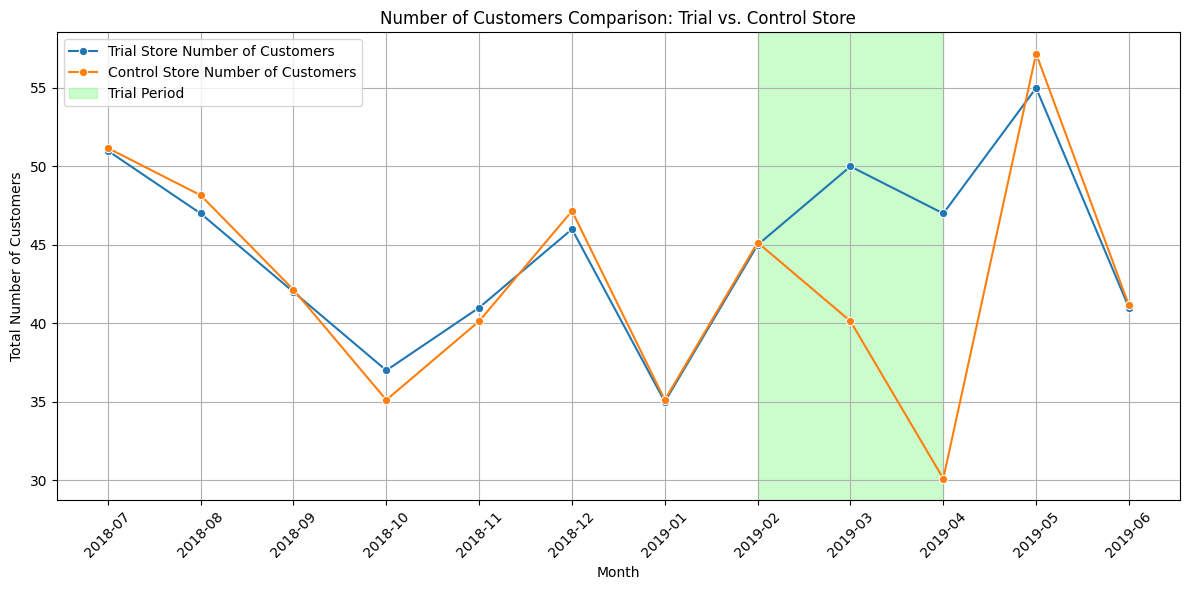

In [98]:
# Convert MONTH to a categorical variable for clear x-axis labeling
comparison_df['Transaction_Month'] = comparison_df['MONTH'].astype(str).str[:4] + "-" + comparison_df['MONTH'].astype(str).str[4:]

# Plot
plt.figure(figsize=(12, 6))

# Plot trial store number of customers
sns.lineplot(data=comparison_df, x='Transaction_Month', y='trial_store_num_customers', label='Trial Store Number of Customers', marker='o')

# Plot control store number of customers
sns.lineplot(data=comparison_df, x='Transaction_Month', y='scaled_control_num_customers', label='Control Store Number of Customers', marker='o')

# Highlight the Trial Period (Feb 2019 - April 2019)
plt.axvspan('2019-02', '2019-04', color='palegreen', alpha=0.5, label="Trial Period")

# Customize the plot
plt.title("Number of Customers Comparison: Trial vs. Control Store")
plt.xlabel("Month")
plt.ylabel("Total Number of Customers")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Trial 86 vs. Control 155

In [102]:
# Define the trial and control store numbers
trial_store = 86
control_store = 155

#### Compare sales during the trial period

In [103]:
# Compute the scaling factor using pre-trial data (before February 2019)
pre_trial_sales_trial = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) &
                                           (pre_trial_measures['MONTH'] < 201902)]['total_sales'].sum()

pre_trial_sales_control = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) &
                                             (pre_trial_measures['MONTH'] < 201902)]['total_sales'].sum()

# Compute scaling factor
scaling_factor_for_control_sales = pre_trial_sales_trial / pre_trial_sales_control

In [104]:
# Apply the scaling factor to control store sales in the full dataset
metrics_sales = metrics.copy()
metrics_sales.loc[metrics_sales['STORE_NBR'] == control_store, 'scaled_control_sales'] = \
    metrics_sales.loc[metrics_sales['STORE_NBR'] == control_store, 'total_sales'] * scaling_factor_for_control_sales

metrics_sales

,STORE_NBR,MONTH,total_sales,num_customers,avg_price_per_unit,transactions_per_customer,chips_per_customer,scaled_control_sales
0,1,201807,206.9,49,3.337097,1.061224,1.265306,NaN
1,1,201808,176.1,42,3.261111,1.023810,1.285714,NaN
2,1,201809,278.8,59,3.717333,1.050847,1.271186,NaN
3,1,201810,188.1,44,3.243103,1.022727,1.318182,NaN
4,1,201811,192.6,46,3.378947,1.021739,1.239130,NaN
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,4.346154,1.066667,2.022222,NaN
3165,272,201903,442.3,50,4.379208,1.060000,2.020000,NaN
3166,272,201904,445.1,54,4.239048,1.018519,1.944444,NaN
3167,272,201905,314.6,34,4.430986,1.176471,2.088235,NaN


In [105]:
# Ensure we are only comparing trial and control stores
trial_store_data = metrics_sales[metrics_sales['STORE_NBR'] == trial_store]
control_store_data = metrics_sales[metrics_sales['STORE_NBR'] == control_store]

# Merge trial and control data to ensure alignment
comparison_df = trial_store_data[['MONTH', 'STORE_NBR', 'total_sales']].merge(
    control_store_data[['MONTH', 'STORE_NBR', 'scaled_control_sales']],
    on='MONTH',
    how='left'
)

# Calculate percentage difference
comparison_df['percentage_difference'] = (
    (comparison_df['total_sales'] - comparison_df['scaled_control_sales']) /
    comparison_df['scaled_control_sales']
) * 100

In [106]:
comparison_df.rename(columns={'STORE_NBR_x': 'trial_store'}, inplace=True)
comparison_df.rename(columns={'STORE_NBR_y': 'control_store'}, inplace=True)
comparison_df.rename(columns={'total_sales': 'trial_store_sales'}, inplace=True)


comparison_df

,MONTH,trial_store,trial_store_sales,control_store,scaled_control_sales,percentage_difference
0,201807,86,892.20,155,896.922236,-0.526493
1,201808,86,764.05,155,759.269991,0.629553
2,201809,86,914.60,155,984.034086,-7.056065
3,201810,86,948.40,155,934.948790,1.438711
4,201811,86,918.00,155,871.894555,5.287961
5,201812,86,841.20,155,824.361363,2.042628
6,201901,86,841.40,155,848.418979,-0.827301
7,201902,86,913.20,155,864.522060,5.630619
8,201903,86,1026.80,155,780.320405,31.586973
9,201904,86,848.20,155,819.317024,3.525250


In [107]:
import scipy.stats as stats
from IPython.display import display

# Calculate the standard deviation of percentage difference in the pre-trial period
pre_trial_diff = comparison_df[comparison_df['MONTH'] < 201902]['percentage_difference']
std_dev = np.std(pre_trial_diff, ddof=1)  # Using ddof=1 for sample standard deviation

# Degrees of Freedom (df = number of pre-trial months - 1)
degrees_of_freedom = len(pre_trial_diff) - 1

In [108]:
# Calculate t-values for trial period months
trial_period = comparison_df[comparison_df['MONTH'].isin([201902, 201903, 201904])].copy()
trial_period['t_value'] = trial_period['percentage_difference'] / std_dev  # Null hypothesis mean (mu) is 0

# Find the critical t-value for 95% confidence level
critical_t_value = stats.t.ppf(0.975, degrees_of_freedom)  # Two-tailed test

# Determine statistical significance (if |t-value| > critical value)
trial_period['is_significant'] = abs(trial_period['t_value']) > critical_t_value

# Display results
display(trial_period[['MONTH', 'percentage_difference', 't_value', 'is_significant']])

# Print summary
print(f"Standard Deviation of Pre-Trial Percentage Difference: {std_dev:.4f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"Critical t-value (95% confidence level): {critical_t_value:.4f}")

,MONTH,percentage_difference,t_value,is_significant
7,201902,5.630619,1.494114,False
8,201903,31.586973,8.381769,True
9,201904,3.525250,0.935444,False


Standard Deviation of Pre-Trial Percentage Difference: 3.7685
Degrees of Freedom: 6
Critical t-value (95% confidence level): 2.4469


The increase in sales in the trial store only in March is statistically greater than in the control store.

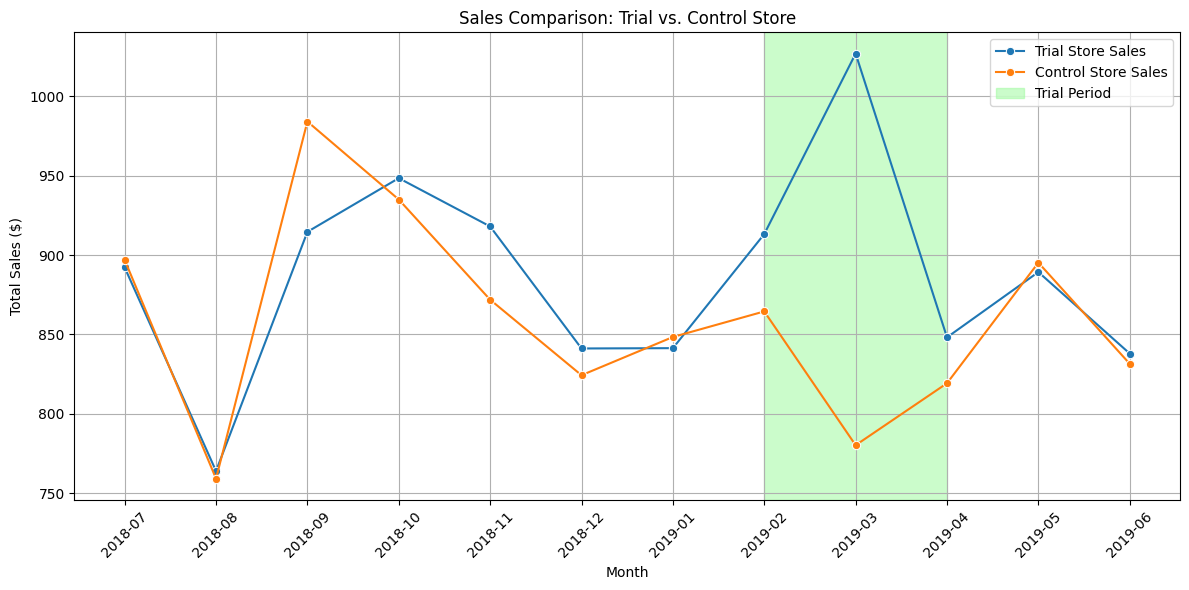

In [109]:
# Convert MONTH to a categorical variable for clear x-axis labeling
comparison_df['Transaction_Month'] = comparison_df['MONTH'].astype(str).str[:4] + "-" + comparison_df['MONTH'].astype(str).str[4:]

# Plot
plt.figure(figsize=(12, 6))

# Plot trial store sales
sns.lineplot(data=comparison_df, x='Transaction_Month', y='trial_store_sales', label='Trial Store Sales', marker='o')

# Plot control store sales
sns.lineplot(data=comparison_df, x='Transaction_Month', y='scaled_control_sales', label='Control Store Sales', marker='o')

# Highlight the Trial Period (Feb 2019 - April 2019)
plt.axvspan('2019-02', '2019-04', color='palegreen', alpha=0.5, label="Trial Period")

# Customize the plot
plt.title("Sales Comparison: Trial vs. Control Store")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Compare number of customers during the trial period

In [110]:
# Compute the scaling factor using pre-trial data (before February 2019)
pre_trial_num_customers_trial = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) &
                                           (pre_trial_measures['MONTH'] < 201902)]['num_customers'].sum()

pre_trial_num_customers_control = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) &
                                             (pre_trial_measures['MONTH'] < 201902)]['num_customers'].sum()

# Compute scaling factor
scaling_factor_for_control_num_customers = pre_trial_num_customers_trial / pre_trial_num_customers_control

In [111]:
# Apply the scaling factor to control store number of customers in the full dataset
metrics_num_customers = metrics.copy()
metrics_num_customers.loc[metrics_num_customers['STORE_NBR'] == control_store, 'scaled_control_num_customers'] = \
    metrics_num_customers.loc[metrics_num_customers['STORE_NBR'] == control_store, 'num_customers'] * scaling_factor_for_control_num_customers

metrics_num_customers

,STORE_NBR,MONTH,total_sales,num_customers,avg_price_per_unit,transactions_per_customer,chips_per_customer,scaled_control_num_customers
0,1,201807,206.9,49,3.337097,1.061224,1.265306,NaN
1,1,201808,176.1,42,3.261111,1.023810,1.285714,NaN
2,1,201809,278.8,59,3.717333,1.050847,1.271186,NaN
3,1,201810,188.1,44,3.243103,1.022727,1.318182,NaN
4,1,201811,192.6,46,3.378947,1.021739,1.239130,NaN
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,4.346154,1.066667,2.022222,NaN
3165,272,201903,442.3,50,4.379208,1.060000,2.020000,NaN
3166,272,201904,445.1,54,4.239048,1.018519,1.944444,NaN
3167,272,201905,314.6,34,4.430986,1.176471,2.088235,NaN


In [112]:
# Ensure we are only comparing trial and control stores
trial_store_data = metrics_num_customers[metrics_num_customers['STORE_NBR'] == trial_store]
control_store_data = metrics_num_customers[metrics_num_customers['STORE_NBR'] == control_store]

# Merge trial and control data to ensure alignment
comparison_df = trial_store_data[['MONTH', 'STORE_NBR', 'num_customers']].merge(
    control_store_data[['MONTH', 'STORE_NBR', 'scaled_control_num_customers']],
    on='MONTH',
    how='left'
)

# Calculate percentage difference
comparison_df['percentage_difference'] = (
    (comparison_df['num_customers'] - comparison_df['scaled_control_num_customers']) /
    comparison_df['scaled_control_num_customers']
) * 100

In [113]:
comparison_df.rename(columns={'STORE_NBR_x': 'trial_store'}, inplace=True)
comparison_df.rename(columns={'STORE_NBR_y': 'control_store'}, inplace=True)
comparison_df.rename(columns={'num_customers': 'trial_store_num_customers'}, inplace=True)

comparison_df

,MONTH,trial_store,trial_store_num_customers,control_store,scaled_control_num_customers,percentage_difference
0,201807,86,99,155,101.0,-1.980198
1,201808,86,94,155,91.0,3.296703
2,201809,86,103,155,103.0,0.000000
3,201810,86,109,155,108.0,0.925926
4,201811,86,100,155,101.0,-0.990099
5,201812,86,98,155,97.0,1.030928
6,201901,86,94,155,96.0,-2.083333
7,201902,86,107,155,95.0,12.631579
8,201903,86,115,155,94.0,22.340426
9,201904,86,105,155,99.0,6.060606


In [114]:
import scipy.stats as stats
from IPython.display import display

# Calculate the standard deviation of percentage difference in the pre-trial period
pre_trial_diff = comparison_df[comparison_df['MONTH'] < 201902]['percentage_difference']
std_dev = np.std(pre_trial_diff, ddof=1)  # Using ddof=1 for sample standard deviation

# Degrees of Freedom (df = number of pre-trial months - 1)
degrees_of_freedom = len(pre_trial_diff) - 1

In [115]:
# Calculate t-values for trial period months
trial_period = comparison_df[comparison_df['MONTH'].isin([201902, 201903, 201904])].copy()
trial_period['t_value'] = trial_period['percentage_difference'] / std_dev  # Null hypothesis mean (mu) is 0

# Find the critical t-value for 95% confidence level
critical_t_value = stats.t.ppf(0.975, degrees_of_freedom)  # Two-tailed test

# Determine statistical significance (if |t-value| > critical value)
trial_period['is_significant'] = abs(trial_period['t_value']) > critical_t_value

# Display results
display(trial_period[['MONTH', 'percentage_difference', 't_value', 'is_significant']])

# Print summary
print(f"Standard Deviation of Pre-Trial Percentage Difference: {std_dev:.4f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"Critical t-value (95% confidence level): {critical_t_value:.4f}")

,MONTH,percentage_difference,t_value,is_significant
7,201902,12.631579,6.592964,True
8,201903,22.340426,11.660429,True
9,201904,6.060606,3.163291,True


Standard Deviation of Pre-Trial Percentage Difference: 1.9159
Degrees of Freedom: 6
Critical t-value (95% confidence level): 2.4469


It looks like the number of customers is significantly higher in all of the three
months. This seems to suggest that the trial had a significant impact on increasing
the number of customers in trial store 86 but as we saw, sales were not
significantly higher. We should check with the Category Manager if there were
special deals in the trial store that were may have resulted in lower prices,
impacting the results.

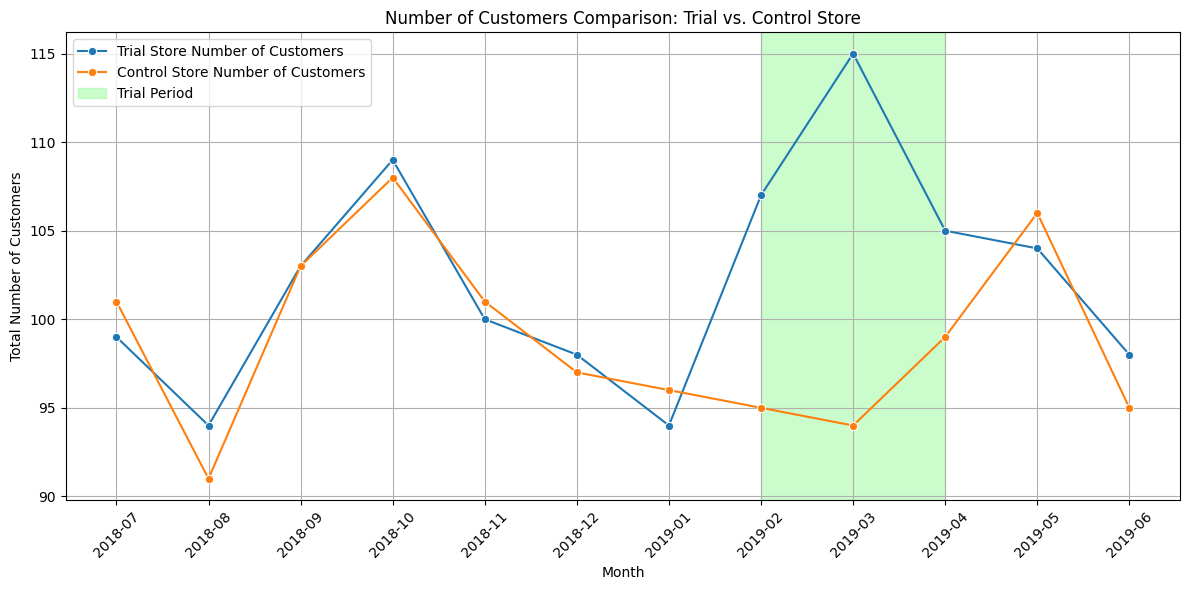

In [116]:
# Convert MONTH to a categorical variable for clear x-axis labeling
comparison_df['Transaction_Month'] = comparison_df['MONTH'].astype(str).str[:4] + "-" + comparison_df['MONTH'].astype(str).str[4:]

# Plot
plt.figure(figsize=(12, 6))

# Plot trial store number of customers
sns.lineplot(data=comparison_df, x='Transaction_Month', y='trial_store_num_customers', label='Trial Store Number of Customers', marker='o')

# Plot control store number of customers
sns.lineplot(data=comparison_df, x='Transaction_Month', y='scaled_control_num_customers', label='Control Store Number of Customers', marker='o')

# Highlight the Trial Period (Feb 2019 - April 2019)
plt.axvspan('2019-02', '2019-04', color='palegreen', alpha=0.5, label="Trial Period")

# Customize the plot
plt.title("Number of Customers Comparison: Trial vs. Control Store")
plt.xlabel("Month")
plt.ylabel("Total Number of Customers")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Trial 88 vs. Control 237

In [117]:
# Define the trial and control store numbers
trial_store = 88
control_store = 237

#### Compare sales during the trial period

In [118]:
# Compute the scaling factor using pre-trial data (before February 2019)
pre_trial_sales_trial = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) &
                                           (pre_trial_measures['MONTH'] < 201902)]['total_sales'].sum()

pre_trial_sales_control = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) &
                                             (pre_trial_measures['MONTH'] < 201902)]['total_sales'].sum()

# Compute scaling factor
scaling_factor_for_control_sales = pre_trial_sales_trial / pre_trial_sales_control

In [119]:
# Apply the scaling factor to control store sales in the full dataset
metrics_sales = metrics.copy()
metrics_sales.loc[metrics_sales['STORE_NBR'] == control_store, 'scaled_control_sales'] = \
    metrics_sales.loc[metrics_sales['STORE_NBR'] == control_store, 'total_sales'] * scaling_factor_for_control_sales

metrics_sales

,STORE_NBR,MONTH,total_sales,num_customers,avg_price_per_unit,transactions_per_customer,chips_per_customer,scaled_control_sales
0,1,201807,206.9,49,3.337097,1.061224,1.265306,NaN
1,1,201808,176.1,42,3.261111,1.023810,1.285714,NaN
2,1,201809,278.8,59,3.717333,1.050847,1.271186,NaN
3,1,201810,188.1,44,3.243103,1.022727,1.318182,NaN
4,1,201811,192.6,46,3.378947,1.021739,1.239130,NaN
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,4.346154,1.066667,2.022222,NaN
3165,272,201903,442.3,50,4.379208,1.060000,2.020000,NaN
3166,272,201904,445.1,54,4.239048,1.018519,1.944444,NaN
3167,272,201905,314.6,34,4.430986,1.176471,2.088235,NaN


In [120]:
# Ensure we are only comparing trial and control stores
trial_store_data = metrics_sales[metrics_sales['STORE_NBR'] == trial_store]
control_store_data = metrics_sales[metrics_sales['STORE_NBR'] == control_store]

# Merge trial and control data to ensure alignment
comparison_df = trial_store_data[['MONTH', 'STORE_NBR', 'total_sales']].merge(
    control_store_data[['MONTH', 'STORE_NBR', 'scaled_control_sales']],
    on='MONTH',
    how='left'
)

# Calculate percentage difference
comparison_df['percentage_difference'] = (
    (comparison_df['total_sales'] - comparison_df['scaled_control_sales']) /
    comparison_df['scaled_control_sales']
) * 100

In [121]:
comparison_df.rename(columns={'STORE_NBR_x': 'trial_store'}, inplace=True)
comparison_df.rename(columns={'STORE_NBR_y': 'control_store'}, inplace=True)
comparison_df.rename(columns={'total_sales': 'trial_store_sales'}, inplace=True)


comparison_df

,MONTH,trial_store,trial_store_sales,control_store,scaled_control_sales,percentage_difference
0,201807,88,1310.00,237,1450.657086,-9.696095
1,201808,88,1323.80,237,1369.931485,-3.367430
2,201809,88,1423.00,237,1324.260425,7.456205
3,201810,88,1352.40,237,1350.401097,0.148023
4,201811,88,1382.80,237,1399.777923,-1.212901
5,201812,88,1325.20,237,1266.971288,4.595898
6,201901,88,1266.40,237,1221.600696,3.667262
7,201902,88,1370.20,237,1406.989143,-2.614742
8,201903,88,1477.20,237,1210.082775,22.074294
9,201904,88,1439.40,237,1206.477165,19.306029


In [122]:
import scipy.stats as stats
from IPython.display import display

# Calculate the standard deviation of percentage difference in the pre-trial period
pre_trial_diff = comparison_df[comparison_df['MONTH'] < 201902]['percentage_difference']
std_dev = np.std(pre_trial_diff, ddof=1)  # Using ddof=1 for sample standard deviation

# Degrees of Freedom (df = number of pre-trial months - 1)
degrees_of_freedom = len(pre_trial_diff) - 1

In [123]:
# Calculate t-values for trial period months
trial_period = comparison_df[comparison_df['MONTH'].isin([201902, 201903, 201904])].copy()
trial_period['t_value'] = trial_period['percentage_difference'] / std_dev  # Null hypothesis mean (mu) is 0

# Find the critical t-value for 95% confidence level
critical_t_value = stats.t.ppf(0.975, degrees_of_freedom)  # Two-tailed test

# Determine statistical significance (if |t-value| > critical value)
trial_period['is_significant'] = abs(trial_period['t_value']) > critical_t_value

# Display results
display(trial_period[['MONTH', 'percentage_difference', 't_value', 'is_significant']])

# Print summary
print(f"Standard Deviation of Pre-Trial Percentage Difference: {std_dev:.4f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"Critical t-value (95% confidence level): {critical_t_value:.4f}")

,MONTH,percentage_difference,t_value,is_significant
7,201902,-2.614742,-0.456726,False
8,201903,22.074294,3.855795,True
9,201904,19.306029,3.372253,True


Standard Deviation of Pre-Trial Percentage Difference: 5.7250
Degrees of Freedom: 6
Critical t-value (95% confidence level): 2.4469


The increase in sales in the trial store in March and April is statistically greater than in the control store.

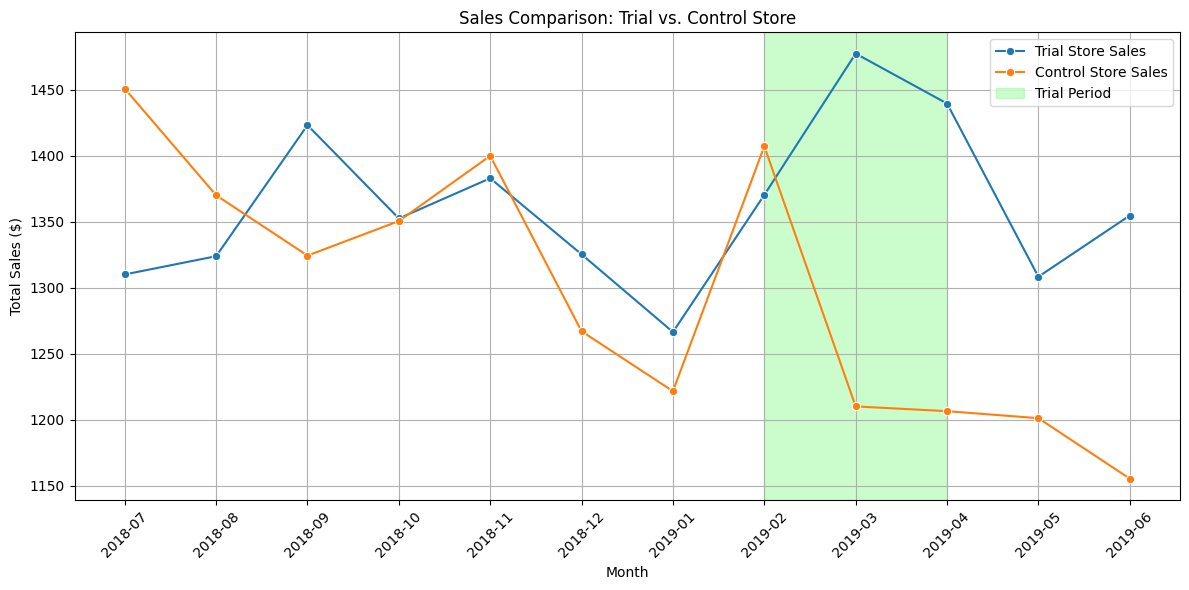

In [124]:
# Convert MONTH to a categorical variable for clear x-axis labeling
comparison_df['Transaction_Month'] = comparison_df['MONTH'].astype(str).str[:4] + "-" + comparison_df['MONTH'].astype(str).str[4:]

# Plot
plt.figure(figsize=(12, 6))

# Plot trial store sales
sns.lineplot(data=comparison_df, x='Transaction_Month', y='trial_store_sales', label='Trial Store Sales', marker='o')

# Plot control store sales
sns.lineplot(data=comparison_df, x='Transaction_Month', y='scaled_control_sales', label='Control Store Sales', marker='o')

# Highlight the Trial Period (Feb 2019 - April 2019)
plt.axvspan('2019-02', '2019-04', color='palegreen', alpha=0.5, label="Trial Period")

# Customize the plot
plt.title("Sales Comparison: Trial vs. Control Store")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Compare number of customers during the trial period

In [125]:
# Compute the scaling factor using pre-trial data (before February 2019)
pre_trial_num_customers_trial = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) &
                                           (pre_trial_measures['MONTH'] < 201902)]['num_customers'].sum()

pre_trial_num_customers_control = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) &
                                             (pre_trial_measures['MONTH'] < 201902)]['num_customers'].sum()

# Compute scaling factor
scaling_factor_for_control_num_customers = pre_trial_num_customers_trial / pre_trial_num_customers_control

In [126]:
# Apply the scaling factor to control store number of customers in the full dataset
metrics_num_customers = metrics.copy()
metrics_num_customers.loc[metrics_num_customers['STORE_NBR'] == control_store, 'scaled_control_num_customers'] = \
    metrics_num_customers.loc[metrics_num_customers['STORE_NBR'] == control_store, 'num_customers'] * scaling_factor_for_control_num_customers

metrics_num_customers

,STORE_NBR,MONTH,total_sales,num_customers,avg_price_per_unit,transactions_per_customer,chips_per_customer,scaled_control_num_customers
0,1,201807,206.9,49,3.337097,1.061224,1.265306,NaN
1,1,201808,176.1,42,3.261111,1.023810,1.285714,NaN
2,1,201809,278.8,59,3.717333,1.050847,1.271186,NaN
3,1,201810,188.1,44,3.243103,1.022727,1.318182,NaN
4,1,201811,192.6,46,3.378947,1.021739,1.239130,NaN
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,4.346154,1.066667,2.022222,NaN
3165,272,201903,442.3,50,4.379208,1.060000,2.020000,NaN
3166,272,201904,445.1,54,4.239048,1.018519,1.944444,NaN
3167,272,201905,314.6,34,4.430986,1.176471,2.088235,NaN


In [127]:
# Ensure we are only comparing trial and control stores
trial_store_data = metrics_num_customers[metrics_num_customers['STORE_NBR'] == trial_store]
control_store_data = metrics_num_customers[metrics_num_customers['STORE_NBR'] == control_store]

# Merge trial and control data to ensure alignment
comparison_df = trial_store_data[['MONTH', 'STORE_NBR', 'num_customers']].merge(
    control_store_data[['MONTH', 'STORE_NBR', 'scaled_control_num_customers']],
    on='MONTH',
    how='left'
)

# Calculate percentage difference
comparison_df['percentage_difference'] = (
    (comparison_df['num_customers'] - comparison_df['scaled_control_num_customers']) /
    comparison_df['scaled_control_num_customers']
) * 100

In [128]:
comparison_df.rename(columns={'STORE_NBR_x': 'trial_store'}, inplace=True)
comparison_df.rename(columns={'STORE_NBR_y': 'control_store'}, inplace=True)
comparison_df.rename(columns={'num_customers': 'trial_store_num_customers'}, inplace=True)

comparison_df

,MONTH,trial_store,trial_store_num_customers,control_store,scaled_control_num_customers,percentage_difference
0,201807,88,129,237,127.276836,1.353871
1,201808,88,131,237,134.237288,-2.411616
2,201809,88,124,237,125.288136,-1.028139
3,201810,88,123,237,122.305085,0.568182
4,201811,88,130,237,131.254237,-0.955579
5,201812,88,126,237,123.299435,2.190249
6,201901,88,117,237,116.338983,0.568182
7,201902,88,124,237,125.288136,-1.028139
8,201903,88,134,237,118.327684,13.244843
9,201904,88,128,237,119.322034,7.272727


In [129]:
import scipy.stats as stats
from IPython.display import display

# Calculate the standard deviation of percentage difference in the pre-trial period
pre_trial_diff = comparison_df[comparison_df['MONTH'] < 201902]['percentage_difference']
std_dev = np.std(pre_trial_diff, ddof=1)  # Using ddof=1 for sample standard deviation

# Degrees of Freedom (df = number of pre-trial months - 1)
degrees_of_freedom = len(pre_trial_diff) - 1

In [130]:
# Calculate t-values for trial period months
trial_period = comparison_df[comparison_df['MONTH'].isin([201902, 201903, 201904])].copy()
trial_period['t_value'] = trial_period['percentage_difference'] / std_dev  # Null hypothesis mean (mu) is 0

# Find the critical t-value for 95% confidence level
critical_t_value = stats.t.ppf(0.975, degrees_of_freedom)  # Two-tailed test

# Determine statistical significance (if |t-value| > critical value)
trial_period['is_significant'] = abs(trial_period['t_value']) > critical_t_value

# Display results
display(trial_period[['MONTH', 'percentage_difference', 't_value', 'is_significant']])

# Print summary
print(f"Standard Deviation of Pre-Trial Percentage Difference: {std_dev:.4f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"Critical t-value (95% confidence level): {critical_t_value:.4f}")

,MONTH,percentage_difference,t_value,is_significant
7,201902,-1.028139,-0.649164,False
8,201903,13.244843,8.362766,True
9,201904,7.272727,4.591985,True


Standard Deviation of Pre-Trial Percentage Difference: 1.5838
Degrees of Freedom: 6
Critical t-value (95% confidence level): 2.4469


Total number of customers in the trial period for the trial store is significantly
higher than the control store for two out of three months, which indicates a
positive trial effect.

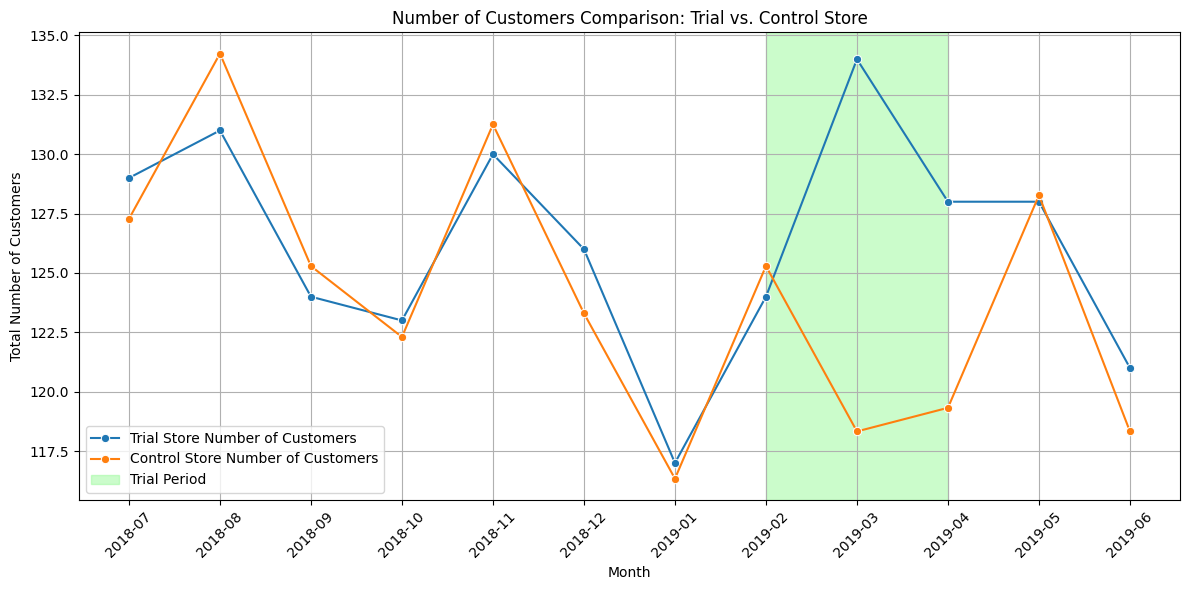

In [131]:
# Convert MONTH to a categorical variable for clear x-axis labeling
comparison_df['Transaction_Month'] = comparison_df['MONTH'].astype(str).str[:4] + "-" + comparison_df['MONTH'].astype(str).str[4:]

# Plot
plt.figure(figsize=(12, 6))

# Plot trial store number of customers
sns.lineplot(data=comparison_df, x='Transaction_Month', y='trial_store_num_customers', label='Trial Store Number of Customers', marker='o')

# Plot control store number of customers
sns.lineplot(data=comparison_df, x='Transaction_Month', y='scaled_control_num_customers', label='Control Store Number of Customers', marker='o')

# Highlight the Trial Period (Feb 2019 - April 2019)
plt.axvspan('2019-02', '2019-04', color='palegreen', alpha=0.5, label="Trial Period")

# Customize the plot
plt.title("Number of Customers Comparison: Trial vs. Control Store")
plt.xlabel("Month")
plt.ylabel("Total Number of Customers")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Conclusion
The results for trial stores 77 and 88 during the trial period show a significant
difference in at least two of the three trial months but this is not the case for
trial store 86. We can check with the client if the implementation of the trial was
different in trial store 86 but overall, the trial shows a significant increase in
sales.